# 📊 Análisis exploratorio: 🏦 Bank Marketing Dataset (UCI)

## 1️⃣ **Introducción y contexto del proyecto**

El análisis exploratorio que se va a realizar está basado en el dataset **Bank Marketing**, publicado por el Banco de Portugal y disponible en el repositorio UCI Machine Learning:  
🔗 https://archive.ics.uci.edu/dataset/222/bank+marketing  

Este conjunto de datos recoge información de campañas de marketing telefónico realizadas por una entidad bancaria portuguesa. El banco contactaba a clientes potenciales con el fin de ofrecerles un depósito a plazo fijo. Cada fila representa a un cliente contactado y las variables recogen aspectos demográficos, financieros y operativos del proceso de captación. Los datos recogidos en este dataset están ordenadores por fecha, desde Mayo del 2008 a Noviembre del 2010.

El fichero que analizaremos, **bank-full.csv**, contiene **45.211 registros** y **17 variables** relacionadas con datos demográficos, laborales, financieros y características de la interacción comercial.

Aunque el objetivo original del dataset era predecir si un cliente contrataría un depósito a plazo fijo, en este proyecto vamos a reutilizar estas variables para analizar y modelar dos grandes escenarios reales dentro del sector financiero: **gestión de patrimonio** y **gestión del riesgo**.

---

## 🎯 **Objetivo del análisis**

El propósito de este análisis es **comprender el perfil financiero y sociodemográfico de los clientes del banco**, analizando sus patrones económicos y su posible estabilidad o capacidad de ahorro.

Para ello, exploraremos en profundidad la columna `balance`, que refleja el **saldo anual promedio de la cuenta bancaria del cliente**. A partir de esta métrica construiremos **dos posibles variables objetivo (targets)**, inspiradas en escenarios reales del sector bancario:

---


## 🅰️ **Escenario A: El Umbral del 90% — Gestión de Patrimonio**

En banca privada existe un fenómeno conocido: **el 10% de los clientes más ricos generan alrededor del 80% de los ingresos del banco** (Principio de Pareto). Identificar este grupo es clave para priorizar servicios personalizados y productos de alto valor.

**Acción realista:**  
Calcular el **percentil 90 (P90)** del `balance`. Ese valor representa el **mínimo saldo que posee el 10% de clientes más adinerados**.

A partir de ese umbral crearemos la variable binaria `Patrimonio_Alto`:

- `Patrimonio_Alto = 1` si `balance > P90`  
- `Patrimonio_Alto = 0` si `balance ≤ P90`

**Interpretación práctica:**  
El modelo resultante permitirá estimar si un cliente **pertenece al segmento de alto patrimonio**, a partir de su edad, trabajo, educación, historial crediticio y comportamiento financiero.  
Esto imita cómo las divisiones de **Wealth Management** detectan clientes con potencial para productos premium.

---

## 🅱️ **Escenario B: El Umbral Cero — Riesgo y Sobregiro**

En gestión de riesgos bancarios, uno de los indicadores más críticos es detectar **clientes con saldo negativo** o riesgo de entrar en sobregiro. Un balance por debajo de cero señala inestabilidad financiera o dependencia del crédito.

**Acción realista:**  
Utilizar el valor **0 como umbral**.

Crearemos la variable binaria `Riesgo_Sobregiro`:

- `Riesgo_Sobregiro = 1` si `balance < 0`  
- `Riesgo_Sobregiro = 0` si `balance ≥ 0`

**Interpretación práctica:**  
El modelo predecirá qué clientes tienen una **alta probabilidad de estar en números rojos**, lo que resulta esencial para los departamentos de **Risk Management**.  
Esto ayuda a anticipar comportamientos financieros que puedan derivar en impagos o necesidad de intervención.

---

## 🧩 **Significado de las variables del dataset**

| **Columna** | **Descripción** |
|-------------|-----------------|
| `age` | Edad del cliente. |
| `job` | Tipo de trabajo u ocupación. |
| `marital` | Estado civil. |
| `education` | Nivel de educación alcanzado. |
| `default` | ¿Tiene impagos en créditos anteriores? |
| `balance` | Saldo medio anual de la cuenta bancaria. |
| `housing` | ¿Tiene hipoteca en curso? (yes/no) |
| `loan` | ¿Tiene algún préstamo personal? |
| `contact` | Tipo de contacto empleado (teléfono móvil o fijo). |
| `day` | Día del mes en que se realizó el último contacto. |
| `month` | Mes del último contacto. |
| `duration` | Duración (en segundos) de la última llamada. |
| `campaign` | Número de contactos realizados durante la campaña. |
| `pdays` | Días desde el último contacto previo a esta campaña. |
| `previous` | Número de contactos en campañas anteriores. |
| `poutcome` | Resultado de campañas anteriores. |
| `y` | Variable original del banco: ¿suscribió el depósito a plazo? (yes/no). |

---

📌 *Fuente de los datos: UCI Machine Learning Repository, Bank Marketing Dataset (2012).*  

Este análisis nos permitirá comprender mejor los perfiles financieros de los clientes y construir modelos predictivos aplicables a contextos reales de banca, tanto en **gestión de patrimonio** como en **evaluación de riesgo**.

---

## 2️⃣ **Importación de librerías y carga del dataset**

Incluye todas las librerías necesarias para manipular datos, visualizar resultados y entrenar modelos.  
Se carga también el fichero `bank-full.csv` y se muestran sus primeras filas para verificar que se ha importado correctamente.

In [137]:
%pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn category_encoders xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [252]:
# Manipulación y análisis de datos
import math
import pandas as pd
import numpy as np
import io # Agregamos io para el manejo de strings como archivos

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelos (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos que usaremos más adelante
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --- Modelos de Regresión Lineal ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# --- Modelos Basados en Árboles ---
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# --- Métricas de Evaluación ---
from sklearn.metrics import r2_score, mean_squared_error

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import time
import itertools
import numpy as np

from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE

from category_encoders import TargetEncoder

Cargamos el dataset y visualizamos las primeras filas

In [139]:
dataset = './data/bank-full.csv'

# 1. Leer el archivo completo como texto
try:
    with open(dataset, 'r', encoding='utf-8') as f:
        content = f.read()
except FileNotFoundError:
    # Manejo de error si el archivo no está en la ubicación esperada
    print(f"Error: No se encontró el archivo '{dataset}'. Asegúrate de que está cargado correctamente.")
    exit()

# 2. Modificación solicitada: Reemplazar todas las comillas dobles (") con una cadena vacía
# Esto limpia tanto el encabezado como el resto de los datos.
cleaned_content = content.replace('"', '')

# 3. Leer el DataFrame usando io.StringIO
# io.StringIO permite a Pandas leer la cadena de texto como si fuera un archivo.
df = pd.read_csv(io.StringIO(cleaned_content), sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


---

## 3️⃣ **Exploración inicial del dataset (EDA básico)**

Este apartado da las primeras pistas sobre posibles problemas o particularidades del dataset.

- .info(), .describe(), .nunique()
- Dimensiones, tipos de datos, distribución inicial.

In [140]:
# Dimensiones del dataset
df.shape

(45211, 17)

In [141]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [142]:
# Estadísticas generales
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [143]:
# Número de valores únicos por columna
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [144]:
# Revisamos la distribución inicial de la variable objetivo para saber si el dataset está desbalanceado
df['balance'].value_counts()

balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64

---

## 4️⃣ **Limpieza de datos**
En esta parte se revisa y corrige la calidad de los datos:
- Detección de valores nulos  
- Comprobación de categorías inconsistentes  
- Revisión de posibles valores atípicos extremos que distorsionen el análisis  
El propósito es garantizar que el dataset sea adecuado para construir modelos fiables.

In [145]:
# Revisamos los valores nulos que pueda tener el dataset
print("\n--- VALORES NULOS ---")
df.isnull().sum()


--- VALORES NULOS ---


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [146]:
print("\n--- VALORES DUPLICADOS ---")
print(df.duplicated().sum())


--- VALORES DUPLICADOS ---
0


In [147]:
# CAMBIAMOS EL NOMBRE A LA VARIABLE 'y' QUE ERA LA VARIABLE OBJETIVO ORIGINAL DEL DATASET
# Definimos el cambio de nombre
rename_map = {
    'y': 'subscribed_term_deposit'
}

# Aplicamos el cambio de nombre
df = df.rename(columns=rename_map)

# Mostramos las primeras filas y los nombres de las columnas para verificar
print("Nombres de columnas después de renombrar:")
print(df.columns.tolist())

Nombres de columnas después de renombrar:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed_term_deposit']


---

## 5️⃣ **Análisis profundo del variable `balance` (variable clave del proyecto)**
La columna `balance` es el pilar de las dos variables objetivo.  
En este apartado se debe:
- Analizar la distribución del balance  
- Identificar valores negativos, picos extraños o colas largas  
- Calcular rangos, percentiles clave (P50, P75, P90, P95)  
- Visualizarlo con histogramas, boxplots o KDE  
Este análisis justifica los umbrales propuestos para los dos escenarios financieros.

### 5.1. Revisión inicial y distribución general

In [148]:
# Primero verificamos el tipo de la columna 'balance' y visualizamos los primeros valores
print("---------- TIPO DE LA COLUMNA BALANCE ----------")
print(df['balance'].dtype)

---------- TIPO DE LA COLUMNA BALANCE ----------
int64


In [149]:
print("---------- MOSTRAMOS LAS 5 PRIMERAS FILAS DE LA COLUMNA BALANCE ----------")
df['balance'].head()

---------- MOSTRAMOS LAS 5 PRIMERAS FILAS DE LA COLUMNA BALANCE ----------


0    2143
1      29
2       2
3    1506
4       1
Name: balance, dtype: int64

In [150]:
print("---------- MOSTRAMOS DATOS DESCRIPTIVOS DE LA COLUMNA BALANCE")
df['balance'].describe()

---------- MOSTRAMOS DATOS DESCRIPTIVOS DE LA COLUMNA BALANCE


count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

#### ¿Qué conclusiones podemos sacar con estos valores?

Al analizar la columna balance, vemos una realidad financiera bastante desigual entre los clientes del banco. Para empezar, encontramos balances negativos que llegan hasta –8.019 €, lo que nos confirma que hay personas con deudas importantes. Esto ya nos da una pista clara: hay un grupo de clientes que podría considerarse en una situación de riesgo, y merece la pena calcular qué parte del dataset se encuentra en números rojos.

Si miramos los percentiles, también queda bastante claro que la mayoría de los clientes no tiene grandes cantidades de dinero en la cuenta. El 25% no llega ni a 72 €, la mitad se queda alrededor de los 448 €, y el 75% está por debajo de 1.428 €. Dicho de forma sencilla: la gran mayoría de los clientes tiene menos de 1.500 € en balance, lo que apunta a perfiles con poco margen financiero y un nivel de ahorro limitado. Además, como la mediana (448 €) es muy inferior a la media (1.362 €), podemos intuir que hay unos pocos clientes con mucho dinero que están tirando del promedio hacia arriba.

Y esto se confirma cuando miramos el valor máximo: 102.127 €, que es una cifra enorme comparada con lo que tiene la mayoría. Esto nos muestra una distribución con una cola derecha muy larga, típica cuando unos pocos clientes acumulan mucho capital. Este pequeño grupo de “grandes balances” hace que la desviación estándar sea muy alta (3.044 €), reflejando que las diferencias entre clientes son bastante grandes.

En resumen, el comportamiento del balance no es uniforme ni equilibrado: hay muchas personas con poco dinero o incluso en negativo, y unas pocas con cantidades muy altas. Por eso, para definir umbrales que clasifiquen a los clientes (por ejemplo: “riesgo”, “estable”, “alto balance”), tiene más sentido apoyarse en percentiles que en la media. La mediana y los percentiles superiores (como P90 o P95) cuentan una historia mucho más fiel de lo que realmente ocurre en la base de clientes.

### 5.2. Analizar específicamente los valores negativos

En este apartado lo que queremos es:

- Saber cuántos clientes están en negativo
- Calcular qué porcentaje representan
- Ver hasta qué punto pueden ser negativos
- Entender si hay valores extremos (outliers negativos)
- Detectar si están agrupados o dispersos

In [151]:
# Primero filtramos los valores negativos
negativos = df[df['balance'] < 0]

# Calculamos el total de valores negativos
cantidad_negativos = len(negativos)
print(f"Cantidad total de filas con un 'balance' negativo: {cantidad_negativos}")

# Calculamos el porcentaje que representa sobre el total
porcentaje_negativos = (cantidad_negativos / len(df)) * 100
print(f"Porcentaje de negativos en el dataset: {round(porcentaje_negativos, 4)}%")

# Miramos también cuál es el valor mínimo y el máximo dentro del grupo de valores negativos
min_negativo = negativos['balance'].min()
max_negativo = negativos['balance'].max()

print(f"Valor mínimo dentro del grupo de negativos: {min_negativo}")
print(f"Valor máximo dentro del grupo de negativos: {max_negativo}")

Cantidad total de filas con un 'balance' negativo: 3766
Porcentaje de negativos en el dataset: 8.3298%
Valor mínimo dentro del grupo de negativos: -8019
Valor máximo dentro del grupo de negativos: -1


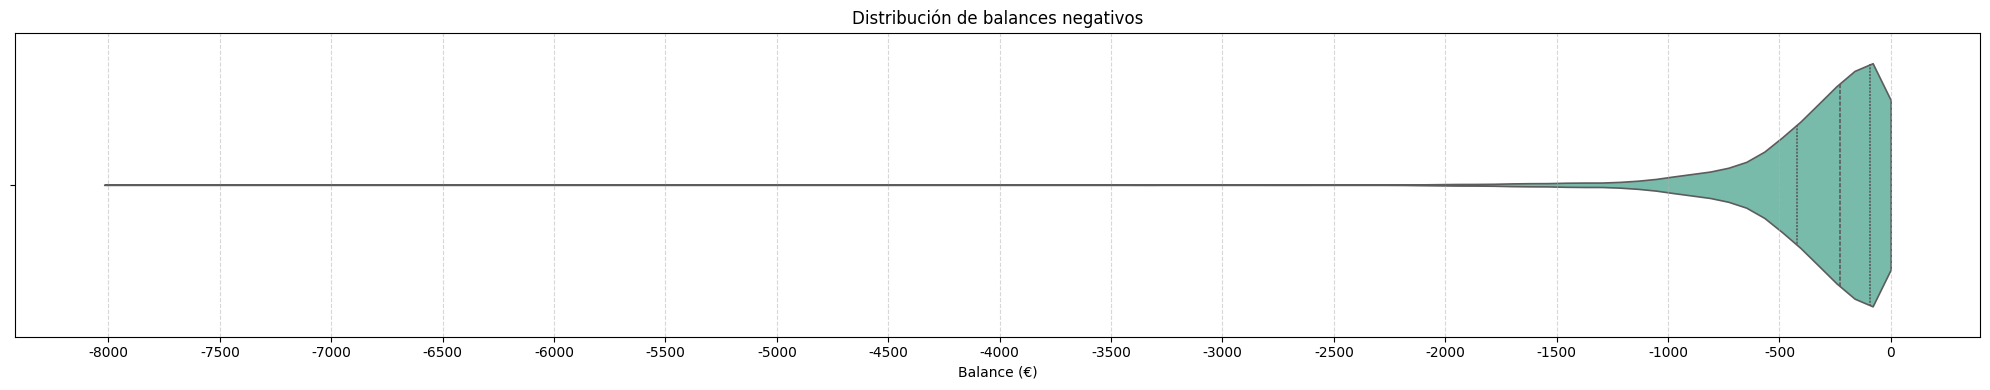

In [152]:
# Visualizamos con un gráfico la distribución de valores negativos para visualizar si los valores negativos se concentran cerca de cero o si hay muchos casos extremos muy negativos
plt.figure(figsize=(20, 4))

sns.violinplot(
    x=negativos['balance'],
    orient='h',
    inner='quartile',
    color='#6EC6B0',      # color más profesional (teal suave)
    linewidth=1.2,        # borde más definido
    cut=0
)

plt.title("Distribución de balances negativos")
plt.xlabel("Balance (€)")

# Crear ticks de 0 a -8000 cada 500
plt.xticks(
    ticks=range(0, -8500, -500), 
    labels=[str(t) for t in range(0, -8500, -500)]
)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

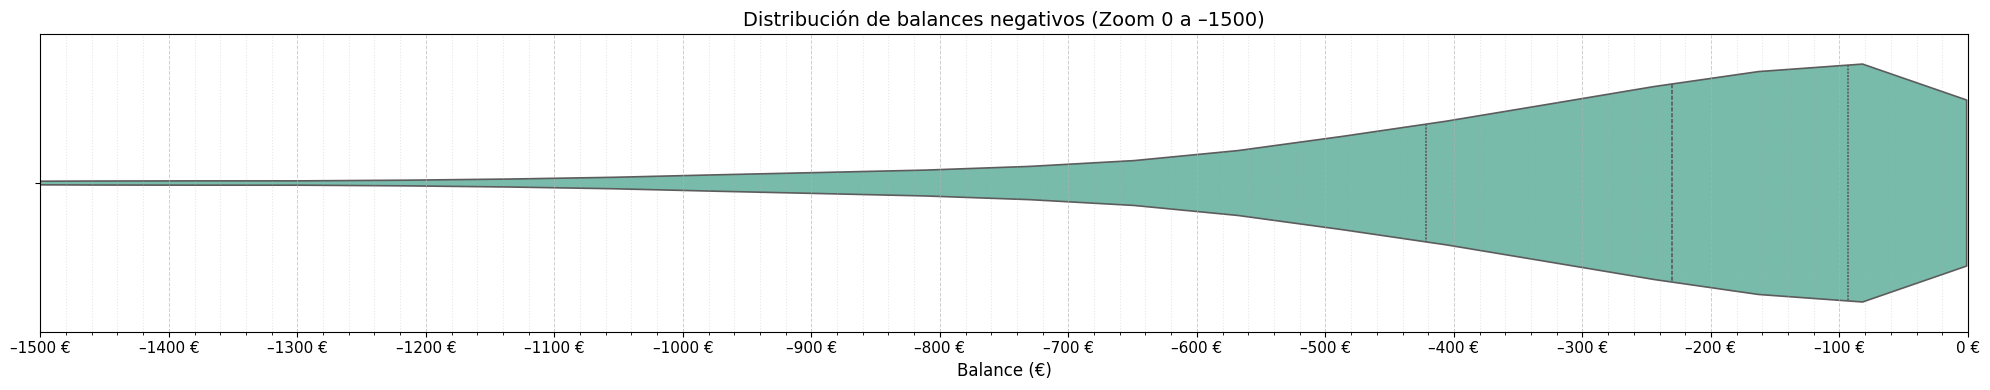

In [153]:
plt.figure(figsize=(20, 4))

sns.violinplot(
    x=negativos['balance'],
    orient='h',
    inner='quartile',
    color='#6EC6B0',      # color más profesional (teal suave)
    linewidth=1.2,        # borde más definido
    cut=0
)

plt.title("Distribución de balances negativos (Zoom 0 a –1500)", fontsize=14)
plt.xlabel("Balance (€)", fontsize=12)

# Crear ticks de 0 a -1500 cada 500 (zona donde está el 90% de los valores negativos)
ticks = range(0, -1600, -100)
labels = [f"{t} €" if t == 0 else f"–{abs(t)} €" for t in ticks]

plt.xticks(
    ticks=ticks,
    labels=labels,
    fontsize=11
)

# Activamos grid principal
plt.grid(axis='x', linestyle='--', alpha=0.6, linewidth=0.7)

# Activamos grid menor para más guía visual
plt.minorticks_on()
plt.grid(axis='x', which='minor', linestyle=':', alpha=0.3)

# Zoom en la parte donde se concentra el 90% de los valores negativos
plt.xlim(-1500, 0)

plt.tight_layout()
plt.show()


### Conclusiones

Los dos gráficos muestran que la mayoría de los clientes que están en negativo lo están por poco. La mayor concentración aparece cerca de 0 €, especialmente entre 0 y –300 €, lo que indica que la mayoría de los descubiertos son pequeños y probablemente temporales.

A medida que el balance se vuelve más negativo, la distribución se va estrechando, lo que refleja que cada vez hay menos clientes con deudas medias (entre –500 € y –1500 €). Son casos menos frecuentes y bastante dispersos.

En el gráfico completo se aprecia claramente que los valores extremadamente negativos existen pero son muy poco comunes. La enorme diferencia entre la concentración cercana a cero y la cola larga hacia –8000 € confirma que los descubiertos profundos son excepcionales y que el grupo principal de clientes en negativo tiene un perfil de riesgo mucho más moderado.

### 5.3. Calcular percentiles clave (P50, P75, P90 y P95)

In [154]:
# ==== Cálculo de percentiles clave ====
p50 = np.percentile(df['balance'], 50)
p75 = np.percentile(df['balance'], 75)
p90 = np.percentile(df['balance'], 90)
p95 = np.percentile(df['balance'], 95)

print("Percentil 50 (mediana):", p50)
print("Percentil 75:", p75)
print("Percentil 90:", p90)
print("Percentil 95:", p95)

Percentil 50 (mediana): 448.0
Percentil 75: 1428.0
Percentil 90: 3574.0
Percentil 95: 5768.0


Tras calcular los percentiles clave de la columna balance, observamos que el 50% de los clientes tiene 448 € o menos, lo que describe claramente al cliente promedio del banco. El percentil 75 se sitúa en torno a 1428 €, indicando que solo una cuarta parte del conjunto supera este nivel.

Los percentiles altos (P90 ≈ 3574 € y P95 ≈ 5768 €) confirman que los clientes con balances altos representan un porcentaje muy reducido.

En la banca real, no todos los clientes son iguales. El 10% de los clientes más ricos a menudo generan el 80% de los ingresos de un banco ("Principio de Pareto"), por lo que elegiremos utilizar el valor del percentil 90.

### 5.4. Representación gráfica mediante Histograma y KDE

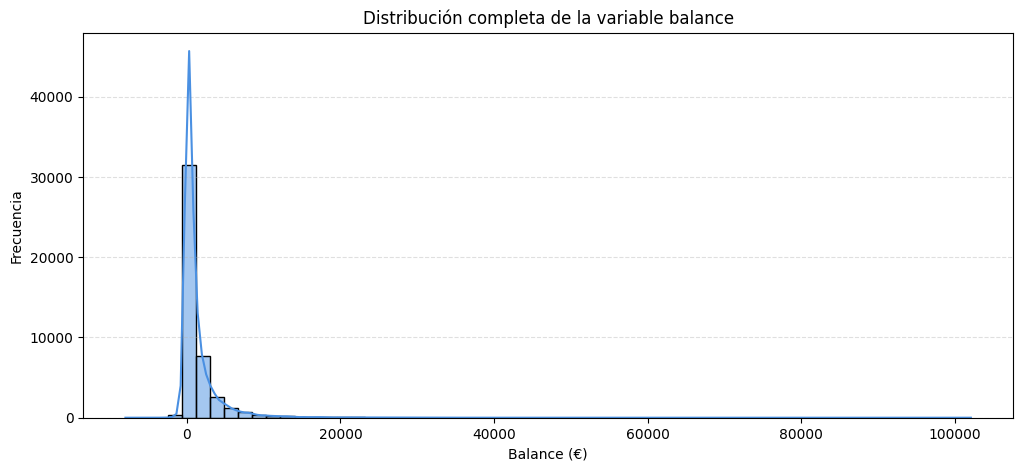

In [155]:
plt.figure(figsize=(12, 5))
sns.histplot(df['balance'], bins=60, kde=True, color='#4A90E2')
plt.title("Distribución completa de la variable balance")
plt.xlabel("Balance (€)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

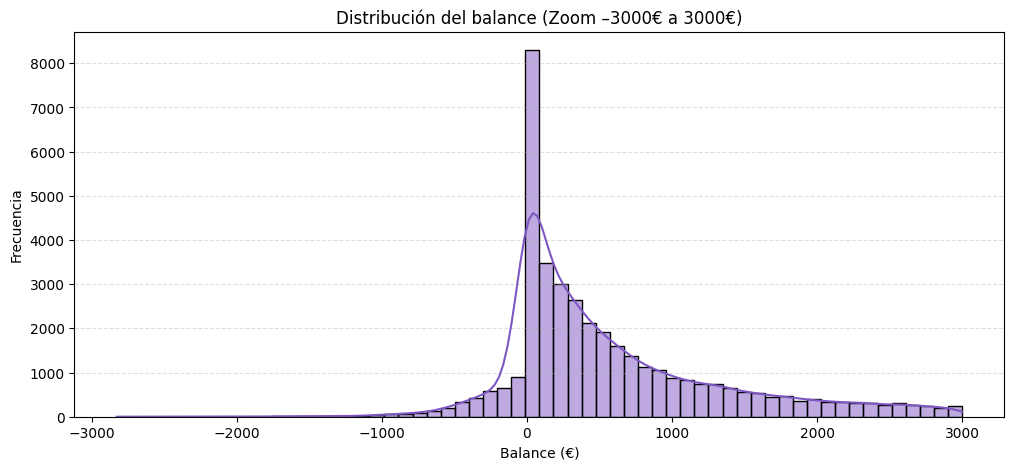

In [156]:
plt.figure(figsize=(12, 5))

sns.histplot(
    df[(df['balance'] >= -3000) & (df['balance'] <= 3000)]['balance'],
    bins=60,
    kde=True,
    color='#7E57C2'
)

plt.title("Distribución del balance (Zoom –3000€ a 3000€)")
plt.xlabel("Balance (€)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### 5.5. Conclusión

Como hemos visto a lo largo de este apartado la avariable **balance** se encuentra fuertemente concentrada alrededor de los 0€, mostrando que la mayoria de personas tienen deudas pequeñas o pequeños ahorros, así mismo pudimos observar un claro sesgo a la derecha indicando que la mayoria de las personas se encuentran en un balance positivo. Existe una larga cola que aunque con pocas personas llega a valores muy altos, esto nos muestra una gran diferencia entre los valores existentes en esta variable habiendo personas con un balance de 0€ mientras hay otras con un balance de más de 100.000€, debdio a estas grandes diferencias consideramos que es necesario realizar un escalado de las variables para que los modelos tengan un mejor rendimiento.

En resumen, el comportamiento del balance no es uniforme ni equilibrado: hay muchas personas con poco dinero o incluso en negativo, y unas pocas con cantidades muy altas. Por eso, para definir umbrales que clasifiquen a los clientes (por ejemplo: “riesgo”, “estable”, “alto balance”), tiene más sentido apoyarse en percentiles que en la media. La mediana y los percentiles superiores (como P90 o P95) cuentan una historia mucho más fiel de lo que realmente ocurre en la base de clientes.

---

## 6️⃣ **Análisis exploratorio de variables financieras y de riesgo**

- Distribución de edades
- Clientes con default (impagos)
- Préstamos personales (loan)
- Personas con hipoteca (housing)

### 6.1. Distribución de edad de la cartera de clientes

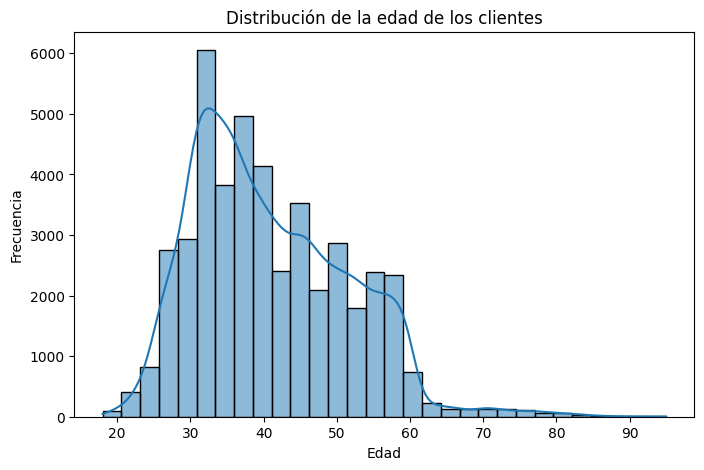

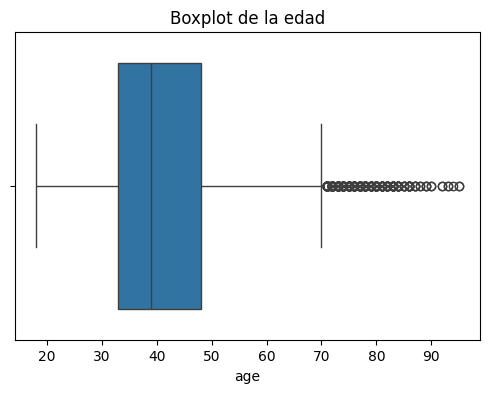

In [157]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], kde=True, bins=30)
plt.title("Distribución de la edad de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df["age"])
plt.title("Boxplot de la edad")
plt.show()

### 6.2. Distribución de clientes con impagos anteriores

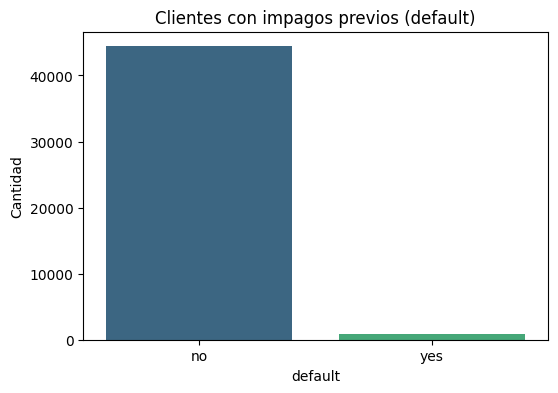

In [158]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="default", hue="default", palette="viridis")
plt.title("Clientes con impagos previos (default)")
plt.xlabel("default")
plt.ylabel("Cantidad")
plt.show()

### 6.3. Distribución de clientes con préstamos personales

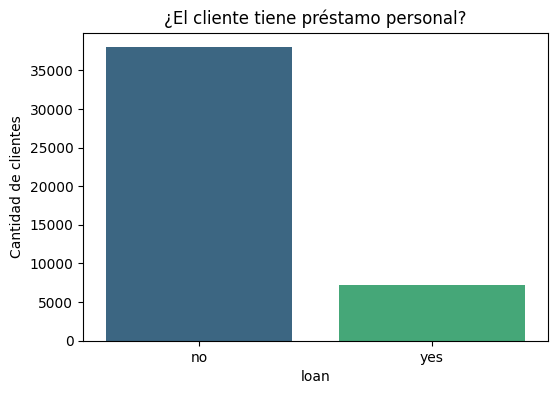

In [159]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="loan", palette="viridis", hue="loan")
plt.title("¿El cliente tiene préstamo personal?")
# plt.xlabel("¿Tienes un préstamo")
plt.ylabel("Cantidad de clientes")
plt.show()

### 6.4. Distribución de clientes que tienen una hipoteca en curso

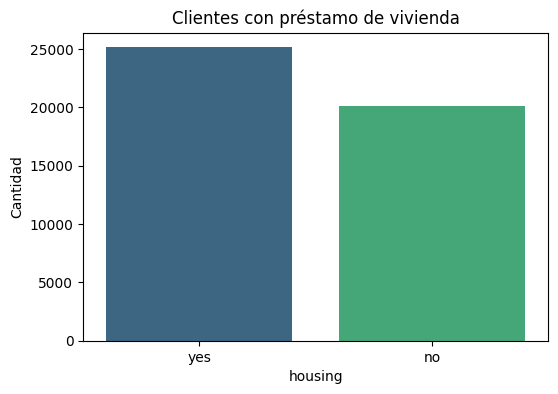

In [160]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="housing", hue="housing", palette="viridis")
plt.title("Clientes con préstamo de vivienda")
# plt.xlabel("housing")
plt.ylabel("Cantidad")
plt.show()

### 6.5. Matriz de correlación de variables numéricas

In [161]:
df_encoded = df.copy()

df_encoded = df_encoded.drop(columns=['pdays', 'contact', 'month', 'day', 'poutcome', 'job', 'duration', 'campaign', 'previous'])

df_encoded = pd.get_dummies(df_encoded, columns=['marital', 'education', 'default', 'housing', 'loan', 'subscribed_term_deposit'], drop_first=True)

df_encoded.columns.tolist()

['age',
 'balance',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'subscribed_term_deposit_yes']

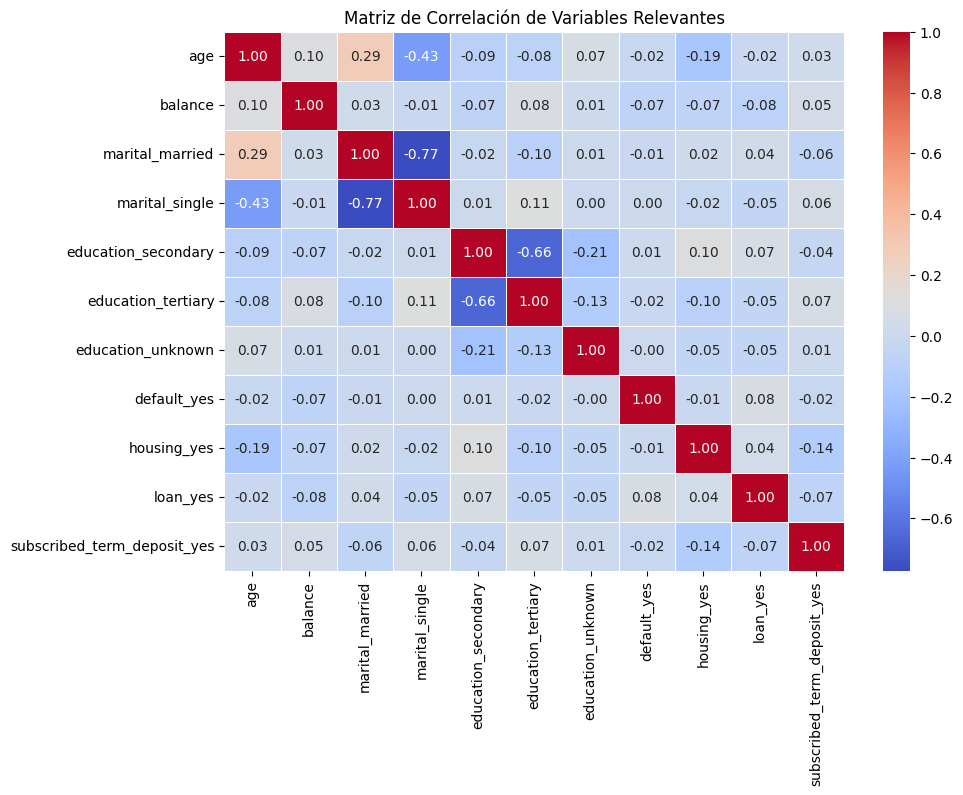

In [162]:
# Calculamos la matriz de correlación
corr_matrix = df_encoded.corr()

# Graficamos el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix, 
    annot=True,      # Muestra los números (coeficientes) en cada celda
    fmt='.2f',       # Formatea los números a 2 decimales
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Matriz de Correlación de Variables Relevantes')
plt.show()

### 6.6. CONCLUSIÓN

El análisis exploratorio de las variables financieras y de riesgo revela que la cartera de clientes del banco está formada mayoritariamente por adultos de mediana edad (30–50 años), con una distribución de edad ligeramente asimétrica hacia valores más jóvenes y la presencia de algunos outliers en edades avanzadas. Este perfil es coherente con personas en plena etapa laboral y con mayor probabilidad de interactuar activamente con productos financieros. El boxplot confirma que, aunque existen clientes de edad muy elevada, estos representan una proporción residual y no alteran de forma significativa la estructura central de la distribución.

En cuanto al riesgo crediticio directo, la variable **default** muestra una desproporción extrema: la inmensa mayoría de los clientes no presenta impagos previos, mientras que solo un porcentaje muy reducido aparece con historial de incumplimiento. Esto indica que el banco trabaja con una base de clientes de riesgo relativamente bajo, pero también implica que **default** es una variable poco informativa para el modelado, al estar fuertemente desbalanceada. En la misma línea, el préstamo personal (**loan**) es minoritario y parece reflejar casos concretos de necesidad de liquidez más que un comportamiento generalizado. Por el contrario, el préstamo de vivienda (**housing**) está mucho más extendido y presenta una distribución más equilibrada entre clientes con y sin hipoteca, lo que la convierte en una variable con mayor potencial explicativo sobre el perfil económico de los clientes.

La matriz de correlaciones aporta un matiz clave: las relaciones más fuertes se dan entre variables demográficas (por ejemplo, la edad con el estado civil) o entre categorías excluyentes (distintos niveles educativos), mientras que la variable **balanc**e apenas presenta correlaciones importantes con el resto de variables analizadas. Esto sugiere que el nivel de patrimonio o el hecho de estar en números rojos no se explica de forma sencilla a partir de las variables demográficas y de riesgo básico disponibles. En términos de modelado, este hallazgo es fundamental: anticipa que la predicción de escenarios como **Patrimonio_Alto** o **Riesgo_Sobregiro** será intrínsecamente compleja cuando se excluye el propio **balanc**e como predictor, y que será necesario recurrir a modelos más sofisticados, técnicas de manejo del desbalanceo y una buena ingeniería de variables para extraer el máximo valor de la información disponible. En conjunto, el EDA pone de manifiesto que el dataset es rico en matices, pero que la señal relevante para distinguir perfiles económicos extremos es sutil y no se refleja de manera evidente en correlaciones simples.


---

## 7️⃣ **Creación de los dos escenarios (targets)**

En ambos casos se debe analizar qué proporción de clientes pertenece a cada grupo y si es necesario aplicar técnicas para tratar desbalances.

## 🟩 Escenario A: `Patrimonio_Alto`

### 7.1. Crear la variable binaria según el umbral

In [163]:
# Crear la variable binaria 'Patrimonio_Alto'

# La variable podrá tener el valor 1 si el balance es mayor que el umbral, 0 si no lo es.
df["Patrimonio_Alto"] = (df["balance"] > p90).astype(int)

# Comprobar la creación de la nueva columna
print("Primeras filas con la nueva variable 'Patrimonio_Alto':")
print(df[['balance', 'Patrimonio_Alto']].head(10))

Primeras filas con la nueva variable 'Patrimonio_Alto':
   balance  Patrimonio_Alto
0     2143                0
1       29                0
2        2                0
3     1506                0
4        1                0
5      231                0
6      447                0
7        2                0
8      121                0
9      593                0


### 7.2. Comprobar cuántos registros quedan en cada clase (balanceadas/desbalanceadas)

In [164]:
# Contar el número de registros en cada clase
conteo_clases = df['Patrimonio_Alto'].value_counts()
proporcion_clases = df['Patrimonio_Alto'].value_counts(normalize=True) * 100

print("\nResultados del Análisis de Desbalance de 'Patrimonio_Alto':")
print("---------------------------------------------------------")
print(f"Conteo de Clases:\n{conteo_clases}")
print("\nProporción de Clases:")
print(proporcion_clases.map('{:.2f}%'.format))


Resultados del Análisis de Desbalance de 'Patrimonio_Alto':
---------------------------------------------------------
Conteo de Clases:
Patrimonio_Alto
0    40690
1     4521
Name: count, dtype: int64

Proporción de Clases:
Patrimonio_Alto
0    90.00%
1    10.00%
Name: proportion, dtype: object


Gracias a esto observamos un dataset claramente desbalanceado, como era de esperar porque P90 define al 10% superior

## 🟥 Escenario B: `Riesgo_Sobregiro`
- Aplicar el umbral cero  
- Crear la variable binaria correspondiente  
- Revisar la distribución resultante 

### 7.3. Aplicar el umbral cero y crear la variable binaria según el umbral

In [165]:
# Definimos el umbral 0
umbral_cero = 0

# Creamos la variable binaria 'Riesgo_Sobregiro'
# 1 si el balance es menor que cero (riesgo/sobregiro), 0 si es cero o positivo.
df['Riesgo_Sobregiro'] = np.where(df['balance'] < umbral_cero, 1, 0)

# Comprobamos la creación de la nueva columna
print("Primeras filas con la nueva variable 'Riesgo_Sobregiro':")
print(df[['balance', 'Riesgo_Sobregiro']].head(10))

Primeras filas con la nueva variable 'Riesgo_Sobregiro':
   balance  Riesgo_Sobregiro
0     2143                 0
1       29                 0
2        2                 0
3     1506                 0
4        1                 0
5      231                 0
6      447                 0
7        2                 0
8      121                 0
9      593                 0


### 7.4. Comprobar cuántos registros quedan en cada clase (balanceadas/desbalanceadas)

In [166]:
# Contar el número de registros en cada clase
conteo_clases_riesgo = df['Riesgo_Sobregiro'].value_counts()
proporcion_clases_riesgo = df['Riesgo_Sobregiro'].value_counts(normalize=True) * 100

print("\nResultados del Análisis de Desbalance de 'Riesgo_Sobregiro':")
print("----------------------------------------------------------")
print(f"Conteo de Clases:\n{conteo_clases_riesgo}")
print("\nProporción de Clases:")
print(proporcion_clases_riesgo.map('{:.2f}%'.format))


Resultados del Análisis de Desbalance de 'Riesgo_Sobregiro':
----------------------------------------------------------
Conteo de Clases:
Riesgo_Sobregiro
0    41445
1     3766
Name: count, dtype: int64

Proporción de Clases:
Riesgo_Sobregiro
0    91.67%
1     8.33%
Name: proportion, dtype: object


### 7.5. Conclusión

Al crear el escenario **Patrimonio_Alto**, observamos que únicamente el 10% de los clientes supera el umbral del percentil 90 del balance. Esto confirma que el grupo de clientes con un nivel económico claramente elevado es muy reducido en comparación con el resto de la base. La distribución está fuertemente desbalanceada, lo que significa que cualquier modelo que utilice esta variable necesitará tener en cuenta este desequilibrio para no favorecer en exceso a la clase mayoritaria.

En el escenario **Riesgo_Sobregiro**, los resultados muestran que aproximadamente el 8.33% de los clientes tiene saldo negativo, mientras que el 91.67% mantiene un balance igual o superior a cero. Aunque este escenario también presenta desbalance, la diferencia entre clases es ligeramente menor que en el caso del patrimonio alto. Aun así, sigue siendo importante considerar técnicas de balanceo si se desea entrenar modelos de clasificación consistentes.

En conjunto, ambos escenarios revelan una estructura muy desigual en los extremos financieros de la cartera: solo una minoría acumula altos niveles de patrimonio y una minoría diferente incurre en sobregiro. Esto ofrece oportunidades interesantes para el modelado, pero también exige atención especial a la desproporción entre clases que podría afectar a futuros algoritmos de machine learning.

---

## 8️⃣ **Preprocesamiento para Machine Learning**
Aquí se preparan los datos antes de entrenar modelos:
- Identificar variables categóricas y numéricas  
- Crear transformadores:  
  - `OneHotEncoder` para categorías  
  - `StandardScaler` para variables numéricas  
- Separar en train/test  

### 8.1. Separar datos en X e Y

In [167]:
X = df.drop(columns=['Patrimonio_Alto', 'Riesgo_Sobregiro', 'balance'])

# Variable objetivo para el escenario A
y_escenario_A = df['Patrimonio_Alto']

# Variable objetivo para el escenario B
y_escenario_B = df['Riesgo_Sobregiro']

### 8.2. Identificar variables categóricas y numéricas

In [168]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

print("Numéricas:", list(num_features))
print("Categóricas:", list(cat_features))

Numéricas: ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed_term_deposit']


### 8.3. Crear transformadores

Para las categóricas usaremos OneHotEncoder y para las numéricas StandardScaler

In [169]:
# Categóricas
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')
categorical_transformer = TargetEncoder()

# Numéricas
numeric_transformer = StandardScaler()

### 8.4. Crear el ColumnTransformer

In [170]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

## 🟩 Escenario A — `Patrimonio_Alto`

### 8.5. Dividir en train/test

In [171]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X,
    y_escenario_A,
    test_size=0.2,
    random_state=42,
    stratify=y_escenario_A
)

### 8.6. Aplicar el preprocesamiento

In [172]:
# Ajustar el preprocesador solo con los datos de entrenamiento
X_train_A_preprocessed = preprocessor.fit_transform(X_train_A, y_train_A)

# Transformar los datos de test con el mismo ajuste
X_test_A_preprocessed = preprocessor.transform(X_test_A)

### 8.7. Rebalanceamos las variables

In [173]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res_A, y_train_res_A = smote.fit_resample(X_train_A_preprocessed, y_train_A)

SMOTE

Solo debes aplicarlo al conjunto de entrenamiento, nunca al test.<br>
Funciona solo con variables numéricas → si tienes variables categóricas, deben estar ya codificadas (OneHotEncoder, LabelEncoder, etc.).

## 🟥 Escenario B: `Riesgo_Sobregiro`

### 8.8. Dividir en train/test

In [174]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X,
    y_escenario_B,
    test_size=0.2,
    random_state=42,
    stratify=y_escenario_B
)

### 8.9. Aplicar el preprocesamiento

In [175]:
# Ajustar el preprocesador solo con los datos de entrenamiento
X_train_B_preprocessed = preprocessor.fit_transform(X_train_B, y_train_B)

# Transformar los datos de test con el mismo ajuste
X_test_B_preprocessed = preprocessor.transform(X_test_B)

In [176]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res_B, y_train_res_B = smote.fit_resample(X_train_B_preprocessed, y_train_B)

---

## 9️⃣ **Entrenamiento de modelos de clasificación**
Para cada escenario (A: Patrimonio_Alto y B: Riesgo_Sobregiro) se entrenaron los
siguientes modelos de clasificación:

- Regresión Logística
- Árbol de Decisión
- Random Forest
- KNN
- Naive Bayes
- SVM
- MLP (red neuronal sencilla)

El conjunto de entrenamiento se balanceó mediante SMOTE para evitar que los
modelos ignorasen la clase minoritaria.
Como métricas principales se utilizaron:

- Accuracy: proporción de aciertos totales.
- Recall (clase 1): capacidad del modelo para detectar correctamente a los
casos positivos (clientes con patrimonio alto / riesgo de sobregiro).
- F1 (clase 1): media armónica entre precisión y recall, enfocada en la
clase positiva.

## 🟩 Escenario A — `Patrimonio_Alto`

### 9.1. Función de evaluación para los modelos

In [177]:
resultados_A = {}
    
def evaluar_modelo_A(nombre, y_true, y_pred, tiempo_entrenamiento=None):
    report = classification_report(y_true, y_pred, output_dict=True, digits=4)
    
    resultados_A[nombre] = {
        "accuracy": report["accuracy"],
        "precision_1": report["1"]["precision"],
        "recall_1": report["1"]["recall"],
        "f1_1": report["1"]["f1-score"],
        "tiempo_entrenamiento": tiempo_entrenamiento
    }

    print(f"=== {nombre} ===")
    print(classification_report(y_true, y_pred, digits=4))

    if tiempo_entrenamiento is not None:
        print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.4f} segundos")

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

### 9.2. Logistic Regression

In [178]:
if False:
	lr_amplio = LogisticRegression(max_iter=2000)

	param_grid_amplio = {
		'C': [0.01, 0.1, 1, 10, 100],
		'solver': ['lbfgs', 'liblinear'],
		'class_weight': [None, 'balanced']
	}

	grid_search_amplio = GridSearchCV(
		estimator=lr_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_A, y_train_res_A)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [179]:
lr = LogisticRegression(max_iter=2000)

param_grid = {
    'C': [80, 100, 120, 150],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,      # usar todos los núcleos
    verbose=2
)

inicio = time.time()
grid_search.fit(X_train_res_A, y_train_res_A)
fin = time.time()

# Mejor modelo
best_lr_a = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred_lr_a = best_lr_a.predict(X_test_A_preprocessed)
tiempo_lr_a = fin - inicio

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'C': 100, 'class_weight': 'balanced', 'solver': 'lbfgs'}


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9345    0.6382    0.7584      8139
           1     0.1549    0.5973    0.2461       904

    accuracy                         0.6341      9043
   macro avg     0.5447    0.6178    0.5022      9043
weighted avg     0.8566    0.6341    0.7072      9043

Tiempo de entrenamiento: 4.7081 segundos


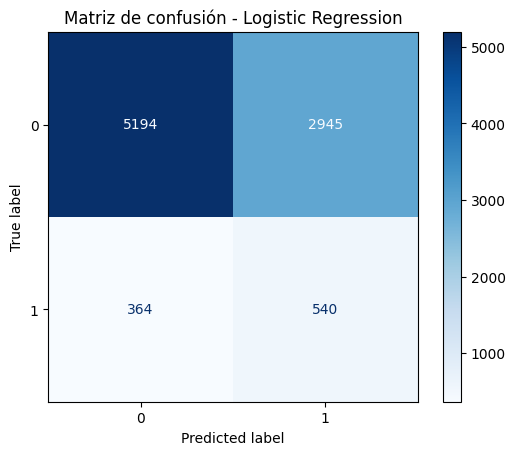

In [180]:
evaluar_modelo_A("Logistic Regression", y_test_A, y_pred_lr_a, tiempo_lr_a)

### 9.3. Decision Tree Classifier

In [181]:
if False:
	dtc_amplio = DecisionTreeClassifier(random_state=42)

	param_grid_amplio = {
		'max_depth': [None, 4, 6, 10, 12],
		'min_samples_split': [2, 5, 10],
		'min_samples_leaf': [1, 2, 4, 6],
		'max_features': [None, 'sqrt', 'log2']
	}

	grid_search_amplio = GridSearchCV(
		estimator=dtc_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_A, y_train_res_A)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [182]:
dtc = DecisionTreeClassifier(random_state=42)

# Definir el diccionario de parámetros a probar
param_grid = {
    'max_depth': [None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [5, 6, 7],
    'max_features': [None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=5,  # validación cruzada con 5 particiones
    scoring='f1',
    n_jobs=-1  # usa todos los núcleos disponibles para acelerar
)

# Entrenar el GridSearchCV
inicio = time.time()
grid_search.fit(X_train_res_A, y_train_res_A)
fin = time.time()

# Obtener el mejor modelo
best_model_dtc_a = grid_search.best_estimator_
# Predecir en el conjunto de prueba
y_pred_dtc_a = best_model_dtc_a.predict(X_test_A_preprocessed)

print("Mejores hiperparámetros:", grid_search.best_params_)
tiempo_dtc_a = fin - inicio

Mejores hiperparámetros: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}


=== Decision Tree Classifier ===
              precision    recall  f1-score   support

           0     0.9065    0.9491    0.9273      8139
           1     0.2054    0.1184    0.1502       904

    accuracy                         0.8661      9043
   macro avg     0.5559    0.5337    0.5387      9043
weighted avg     0.8364    0.8661    0.8496      9043

Tiempo de entrenamiento: 3.0486 segundos


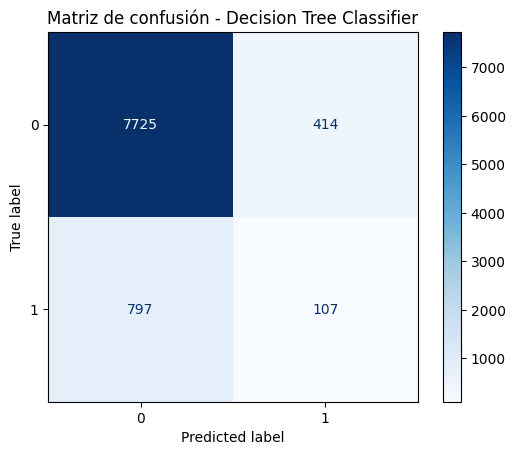

In [183]:
evaluar_modelo_A("Decision Tree Classifier", y_test_A, y_pred_dtc_a, tiempo_dtc_a)

### 9.4. Random Forest Classifier

In [184]:
if False:
	rfc_amplio = RandomForestClassifier(random_state=42)

	param_grid_amplio = {
		'n_estimators': [100, 250, 400],
		'max_depth': [None, 20, 40],
		'max_features': ['sqrt', 'log2']
	}

	grid_search_amplio = GridSearchCV(
		estimator=rfc_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_A, y_train_res_A)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [185]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [40, 60, 80, 100],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Entrenar el GridSearchCV
inicio = time.time()
grid_search.fit(X_train_res_A, y_train_res_A)
fin = time.time()

# Obtener el mejor modelo
best_model_rfc_a = grid_search.best_estimator_
# Predecir en el conjunto de prueba
y_pred_rfc_a = best_model_rfc_a.predict(X_test_A_preprocessed)

print("Mejores hiperparámetros:", grid_search.best_params_)
tiempo_rfc_a = fin - inicio

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros: {'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 600}


=== Random Forest Classifier ===
              precision    recall  f1-score   support

           0     0.9010    0.9905    0.9436      8139
           1     0.1895    0.0199    0.0360       904

    accuracy                         0.8935      9043
   macro avg     0.5452    0.5052    0.4898      9043
weighted avg     0.8299    0.8935    0.8529      9043

Tiempo de entrenamiento: 322.9365 segundos


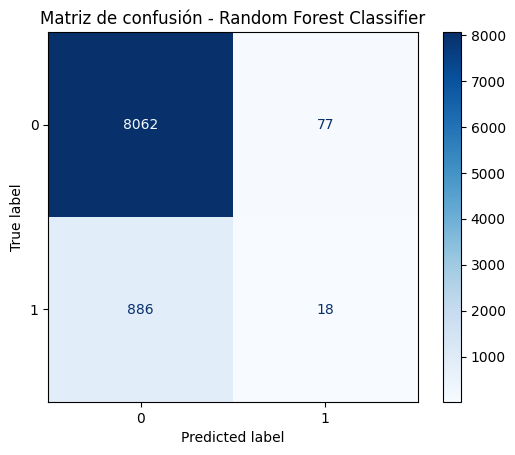

In [186]:
evaluar_modelo_A("Random Forest Classifier", y_test_A, y_pred_rfc_a, tiempo_rfc_a)

### 9.5. KNN

In [187]:
if False:
	knn_amplio = KNeighborsClassifier()

	param_grid_amplio = {
		'n_neighbors': [1, 10, 20],
		'weights': ['uniform', 'distance'],
		'metric': ['euclidean', 'manhattan', 'minkowski']
	}

	grid_search_amplio = GridSearchCV(
		estimator=knn_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_A, y_train_res_A)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [188]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 2, 3],
    'weights': ['uniform'],
    'metric': ['manhattan']
}

# Crear Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Entrenar el GridSearchCV
inicio = time.time()
grid_search.fit(X_train_res_A, y_train_res_A)
fin = time.time()

# Obtener el mejor modelo
best_model_knn_a = grid_search.best_estimator_
# Predecir en el conjunto de prueba
y_pred_knn_a = best_model_knn_a.predict(X_test_A_preprocessed)

print("Mejores hiperparámetros:", grid_search.best_params_)

tiempo_knn_a = fin - inicio

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


=== KNN ===
              precision    recall  f1-score   support

           0     0.9054    0.8564    0.8802      8139
           1     0.1309    0.1947    0.1565       904

    accuracy                         0.7902      9043
   macro avg     0.5181    0.5255    0.5184      9043
weighted avg     0.8280    0.7902    0.8079      9043

Tiempo de entrenamiento: 11.8821 segundos


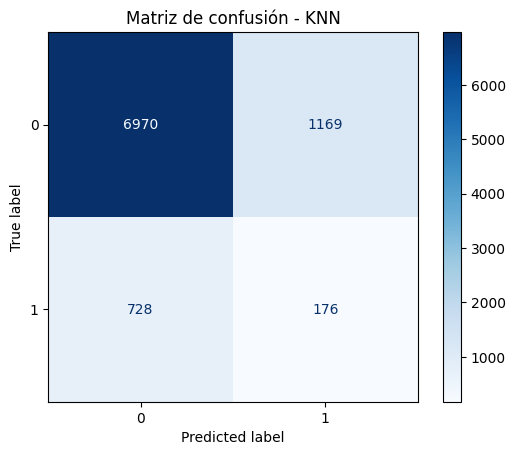

In [189]:
evaluar_modelo_A("KNN", y_test_A, y_pred_knn_a, tiempo_knn_a)

### 9.6. Naive Bayes

In [190]:
nb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Crear Grid Search
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
inicio = time.time()
grid_search.fit(X_train_res_A, y_train_res_A)
fin = time.time()

print(grid_search.best_params_)

# Extraer mejor modelo
best_model_nb_a = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_nb_a = best_model_nb_a.predict(X_test_A_preprocessed)

tiempo_nb_a = fin - inicio

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'var_smoothing': 0.0001}


=== Naive Bayes ===
              precision    recall  f1-score   support

           0     0.9483    0.3740    0.5364      8139
           1     0.1265    0.8164    0.2191       904

    accuracy                         0.4182      9043
   macro avg     0.5374    0.5952    0.3778      9043
weighted avg     0.8661    0.4182    0.5047      9043

Tiempo de entrenamiento: 5.4131 segundos


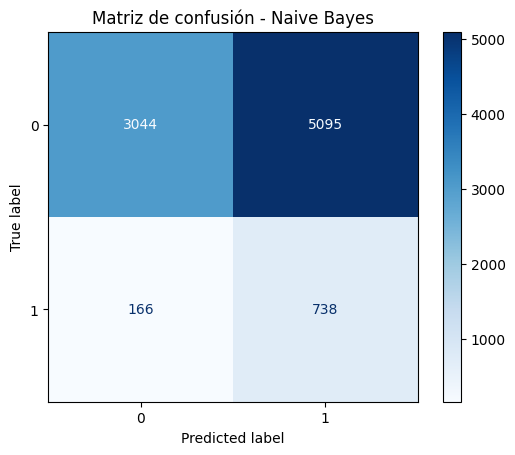

In [191]:
evaluar_modelo_A("Naive Bayes", y_test_A, y_pred_nb_a, tiempo_nb_a)

### 9.7. Linear Support Vector Machines

In [192]:
if False:
	param_grid_amplio = {'C': [0.01, 0.1, 1, 10, 20]}

	grid_svc_amplio = GridSearchCV(
		estimator=LinearSVC(random_state=42),
		param_grid=param_grid_amplio,
		scoring='f1',
		cv=3,
		n_jobs=1
	)

	grid_svc_amplio.fit(X_train_res_A, y_train_res_A)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_svc_amplio.best_params_)

In [193]:
param_grid = {'C': [18, 20, 24, 28, 32]}

grid_svc = GridSearchCV(
    estimator=LinearSVC(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=1
)

inicio = time.time()
grid_svc.fit(X_train_res_A, y_train_res_A)
fin = time.time()

best_svc_a = grid_svc.best_estimator_
y_pred_svc_a = best_svc_a.predict(X_test_A_preprocessed)

print("Mejor parámetro:", grid_svc.best_params_)

tiempo_svc_a = fin - inicio

Mejor parámetro: {'C': 24}


=== SVM Lineal (SMOTE) ===
              precision    recall  f1-score   support

           0     0.9341    0.6431    0.7618      8139
           1     0.1555    0.5918    0.2463       904

    accuracy                         0.6380      9043
   macro avg     0.5448    0.6174    0.5040      9043
weighted avg     0.8563    0.6380    0.7102      9043

Tiempo de entrenamiento: 2.6753 segundos


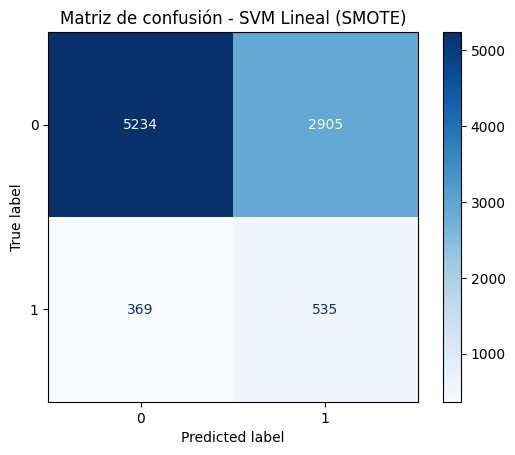

In [194]:
evaluar_modelo_A("SVM Lineal (SMOTE)", y_test_A, y_pred_svc_a, tiempo_svc_a)

### 9.8. MLP

In [195]:
if False:
	hidden_layer_options = [
		(50,),
		(100,),
		(100, 50),
		(100, 50, 25),
		(150, 75),
		(200, 100, 50)
	]

	activation_options = ['relu', 'tanh']
	solver_options = ['adam']
	learning_rates = [0.001, 0.0005, 0.0001]

	# -------------------------------------------------------------------
	# BÚSQUEDA DE TODAS LAS COMBINACIONES
	# -------------------------------------------------------------------
	best_f1 = 0
	best_params = None

	total_tests = len(hidden_layer_options) * len(activation_options) * len(solver_options) * len(learning_rates)
	print(f"\nProbando {total_tests} combinaciones...\n")

	for hls, act, solv, lr in itertools.product(hidden_layer_options, activation_options, solver_options, learning_rates):

		print(f"Probando: hidden={hls}, activation={act}, solver={solv}, lr={lr}")

		mlp = MLPClassifier(
			hidden_layer_sizes=hls,
			activation=act,
			solver=solv,
			learning_rate_init=lr,
			max_iter=500,
			random_state=42
		)

		mlp.fit(X_train_res_A, y_train_res_A)
		y_pred = mlp.predict(X_test_A_preprocessed)
		f1 = f1_score(y_test_A, y_pred, pos_label=1)  # F1 para la clase 1

		print(f" → F1 (clase 1): {f1:.4f}\n")

		if f1 > best_f1:
			best_f1 = f1
			best_params = (hls, act, solv, lr)

	# -------------------------------------------------------------------
	# RESULTADOS FINALES
	# -------------------------------------------------------------------
	print("========================================")
	print("MEJOR COMBINACIÓN ENCONTRADA:")
	print("Hidden layers:", best_params[0])
	print("Activation:", best_params[1])
	print("Solver:", best_params[2])
	print("Learning rate:", best_params[3])
	print(f"F1 (clase 1): {best_f1:.4f}")
	print("========================================")

In [196]:
mlp_a = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

inicio = time.time()
mlp_a.fit(X_train_res_A, y_train_res_A)
fin = time.time()

y_pred_mlp_a = mlp_a.predict(X_test_A_preprocessed)

tiempo_mlp_a = fin - inicio

=== MLP ===
              precision    recall  f1-score   support

           0     0.9137    0.8075    0.8573      8139
           1     0.1530    0.3131    0.2055       904

    accuracy                         0.7580      9043
   macro avg     0.5333    0.5603    0.5314      9043
weighted avg     0.8376    0.7580    0.7921      9043

Tiempo de entrenamiento: 395.5811 segundos


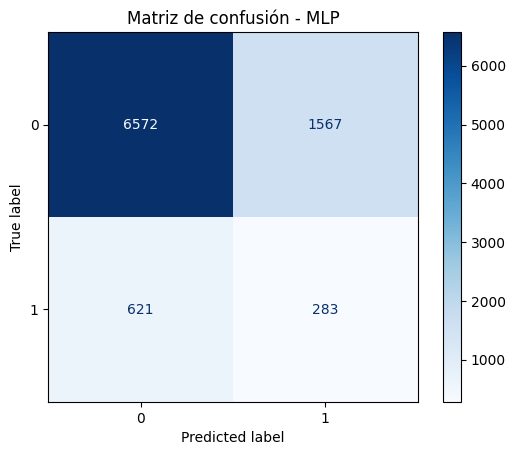

In [197]:
evaluar_modelo_A("MLP", y_test_A, y_pred_mlp_a, tiempo_mlp_a)

### 9.9. XGB Classifier

In [198]:
if False:
	# Modelo base
	xgb_amplio = XGBClassifier(
		eval_metric='logloss'
	)

	# Param grid amplio (exploratorio)
	param_grid_amplio = {
		'n_estimators': [100, 200],
		'max_depth': [3, 5],
		'learning_rate': [0.05, 0.1],
		'subsample': [0.8, 1.0],
		'colsample_bytree': [0.8, 1.0]
	}

	# Grid search
	grid_search_amplio = GridSearchCV(
		estimator=xgb_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,         # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_A, y_train_res_A)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [199]:
xgb_a = XGBClassifier(
    eval_metric='logloss'
)

param_grid = {
    'n_estimators': [180, 200, 220],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [1.0]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_a,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
inicio = time.time()
grid_search.fit(X_train_res_A, y_train_res_A)
fin = time.time()

print(grid_search.best_params_)

# Extraer mejor modelo
best_model_xgb_a = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_xgb_a = best_model_xgb_a.predict(X_test_A_preprocessed)

tiempo_xgb_a = fin - inicio

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 220, 'subsample': 0.8}


=== XGB Classifier ===
              precision    recall  f1-score   support

           0     0.9008    0.9980    0.9469      8139
           1     0.3600    0.0100    0.0194       904

    accuracy                         0.8993      9043
   macro avg     0.6304    0.5040    0.4831      9043
weighted avg     0.8467    0.8993    0.8542      9043

Tiempo de entrenamiento: 14.9414 segundos


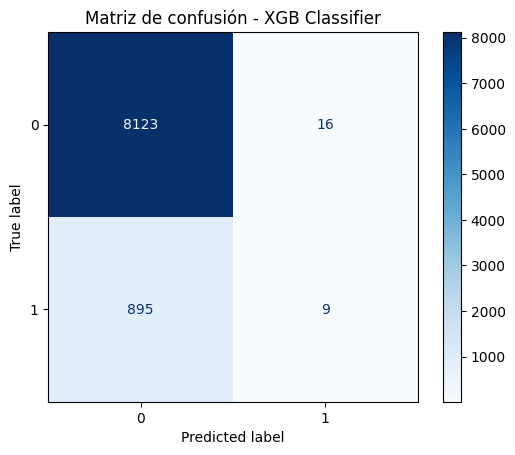

In [200]:
evaluar_modelo_A("XGB Classifier", y_test_A, y_pred_xgb_a, tiempo_xgb_a)

### 9.10. LightGBM

In [201]:
if False:
    lgbm = LGBMClassifier(random_state=42)

    # Definir la rejilla de hiperparámetros para LightGBM
    param_grid_amplio = {
        'n_estimators': [180, 200, 220],
        'max_depth': [4, 6, 8, 10],
        'learning_rate': [0.1, 0.05, 0.01],
        'subsample': [0.6, 0.8, 1],          # fracción de muestras usadas en cada iteración
        'colsample_bytree': [0.6, 0.8, 1.0]         # fracción de features usadas en cada árbol
    }

    # Configurar Grid Search para optimizar F1-score
    grid_search_amplio_lgbm = GridSearchCV(
        estimator=lgbm,
        param_grid=param_grid_amplio,
        cv=5,
        scoring='f1',
        n_jobs=-1,       # usar todos los núcleos
        verbose=2
    )

    grid_search_amplio_lgbm.fit(X_train_res_A, y_train_res_A)

    # Mejor modelo
    print("Mejores hiperparámetros:", grid_search_amplio_lgbm.best_params_)

In [202]:
lgbm_a = LGBMClassifier(
    objective='binary',
    metric='binary_logloss'
)

param_grid = {
    'n_estimators': [200, 220, 240],
    'max_depth': [6, 8],                  # probar un poco más profundo o menos
    'learning_rate': [0.1, 0.15],     # tasas de aprendizaje cercanas
    'subsample': [0.6, 0.7, 0.8],           # ligeros cambios en muestreo de filas
    'colsample_bytree': [0.6, 0.7, 0.8]          # probar un poco menos de features
}

# Grid search
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_a,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
inicio = time.time()
grid_search_lgbm.fit(X_train_res_A, y_train_res_A)
fin = time.time()

# Extraer el mejor modelo
best_model_lgbm_a = grid_search_lgbm.best_estimator_

# Predicción
y_pred_lgbm_a = best_model_lgbm_a.predict(X_test_A_preprocessed)


# Tiempo
tiempo_lgbm_a = fin - inicio


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 32551, number of negative: 32551
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,002460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3836
[LightGBM] [Info] Number of data points in the train set: 65102, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\albam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM Classifier ===
              precision    recall  f1-score   support

           0     0.9003    0.9982    0.9467      8139
           1     0.2105    0.0044    0.0087       904

    accuracy                         0.8988      9043
   macro avg     0.5554    0.5013    0.4777      9043
weighted avg     0.8313    0.8988    0.8529      9043

Tiempo de entrenamiento: 232.5749 segundos


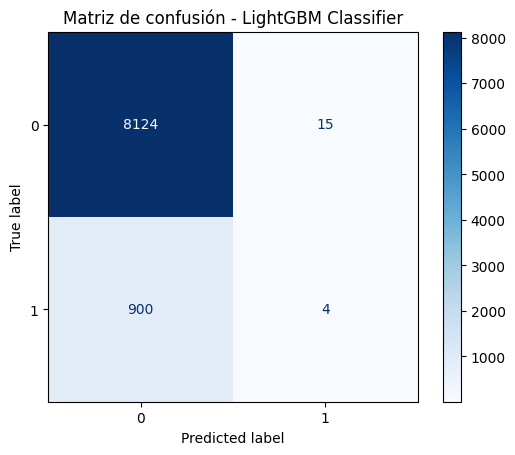

In [203]:
evaluar_modelo_A("LightGBM Classifier", y_test_A, y_pred_lgbm_a, tiempo_lgbm_a)

## 🟥 Escenario B: `Riesgo_Sobregiro`

### 9.10. Función de evaluación para los modelos

In [204]:
resultados_B = {}

def evaluar_modelo_B(nombre, y_true, y_pred, tiempo_entrenamiento=None):
    report = classification_report(y_true, y_pred, output_dict=True, digits=4)
    
    resultados_B[nombre] = {
        "accuracy": report["accuracy"],
        "precision_1": report["1"]["precision"],
        "recall_1": report["1"]["recall"],
        "f1_1": report["1"]["f1-score"],
        "tiempo_entrenamiento": tiempo_entrenamiento
    }

    print(f"=== {nombre} ===")
    print(classification_report(y_true, y_pred, digits=4))

    if tiempo_entrenamiento is not None:
        print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.4f} segundos")

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

### 9.11. Logistic Regression

In [205]:
if False:
	lr_amplio = LogisticRegression(max_iter=2000)

	param_grid_amplio = {
		'C': [0.01, 0.1, 1, 10, 100],
		'solver': ['lbfgs', 'liblinear'],
		'class_weight': [None, 'balanced']
	}

	grid_search_amplio = GridSearchCV(
		estimator=lr_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_B, y_train_res_B)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [206]:
lr = LogisticRegression(max_iter=2000)

param_grid = {
    'C': [80, 100, 120, 150],
    'solver': ['liblinear'],
    'class_weight': [None]
}

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,      # usar todos los núcleos
    verbose=2
)

inicio = time.time()
grid_search.fit(X_train_res_B, y_train_res_B)
fin = time.time()

# Mejor modelo
best_lr_b = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred_lr_b = best_lr_b.predict(X_test_B_preprocessed)
tiempo_lr_b = fin - inicio

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'C': 150, 'class_weight': None, 'solver': 'liblinear'}


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9602    0.6662    0.7866      8290
           1     0.1592    0.6959    0.2591       753

    accuracy                         0.6687      9043
   macro avg     0.5597    0.6811    0.5229      9043
weighted avg     0.8935    0.6687    0.7427      9043

Tiempo de entrenamiento: 2.0273 segundos


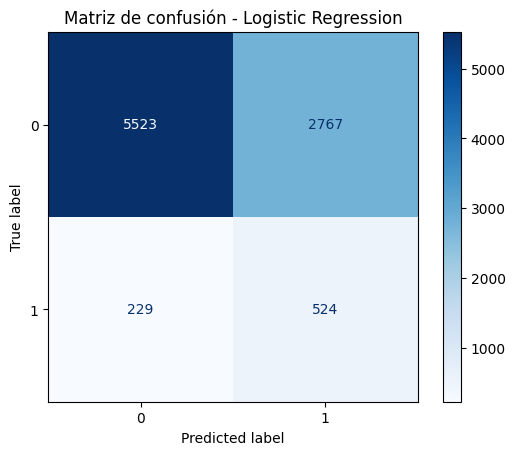

In [207]:
evaluar_modelo_B("Logistic Regression", y_test_B, y_pred_lr_b, tiempo_lr_b)

### 9.12. Decision Tree Classifier

In [208]:
if False:
	dtc_amplio = DecisionTreeClassifier(random_state=42)

	param_grid_amplio = {
		'max_depth': [None, 4, 6, 10, 12],
		'min_samples_split': [2, 5, 10],
		'min_samples_leaf': [1, 2, 4, 6],
		'max_features': [None, 'sqrt', 'log2']
	}

	grid_search_amplio = GridSearchCV(
		estimator=dtc_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_B, y_train_res_B)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [209]:
dtc = DecisionTreeClassifier(random_state=42)

# Definir el diccionario de parámetros a probar
param_grid = {
    'max_depth': [None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [5, 6, 7],
    'max_features': [None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=5,  # validación cruzada con 5 particiones
    scoring='f1',
    n_jobs=-1  # usa todos los núcleos disponibles para acelerar
)

# Entrenar el GridSearchCV
inicio = time.time()
grid_search.fit(X_train_res_B, y_train_res_B)
fin = time.time()

# Obtener el mejor modelo
best_model_dtc_b = grid_search.best_estimator_
# Predecir en el conjunto de prueba
y_pred_dtc_b = best_model_dtc_b.predict(X_test_B_preprocessed)

print("Mejores hiperparámetros:", grid_search.best_params_)
tiempo_dtc_b = fin - inicio

Mejores hiperparámetros: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}


=== Decision Tree Classifier ===
              precision    recall  f1-score   support

           0     0.9234    0.9566    0.9397      8290
           1     0.2088    0.1262    0.1573       753

    accuracy                         0.8874      9043
   macro avg     0.5661    0.5414    0.5485      9043
weighted avg     0.8639    0.8874    0.8745      9043

Tiempo de entrenamiento: 1.7564 segundos


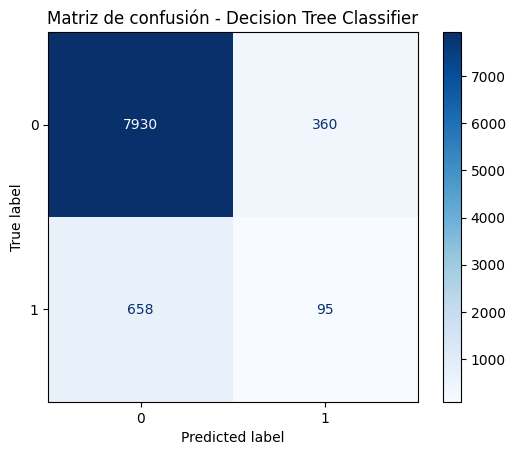

In [210]:
evaluar_modelo_B("Decision Tree Classifier", y_test_B, y_pred_dtc_b, tiempo_dtc_b)

### 9.13. Random Forest

In [211]:
if False:
	rfc_amplio = RandomForestClassifier(random_state=42, class_weight="balanced")

	param_grid_amplio = {
		'n_estimators': [100, 250, 400],
		'max_depth': [None, 20, 40],
		'max_features': ['sqrt', 'log2']
	}

	grid_search_amplio = GridSearchCV(
		estimator=rfc_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_B, y_train_res_B)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [212]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': [None],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Entrenar el GridSearchCV
inicio = time.time()
grid_search.fit(X_train_res_B, y_train_res_B)
fin = time.time()

# Obtener el mejor modelo
best_model_rfc_b = grid_search.best_estimator_
# Predecir en el conjunto de prueba
y_pred_rfc_b = best_model_rfc_b.predict(X_test_B_preprocessed)

print("Mejores hiperparámetros:", grid_search.best_params_)
tiempo_rfc_b = fin - inicio

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 350}


=== Random Forest Classifier ===
              precision    recall  f1-score   support

           0     0.9241    0.9900    0.9559      8290
           1     0.4877    0.1049    0.1727       753

    accuracy                         0.9163      9043
   macro avg     0.7059    0.5475    0.5643      9043
weighted avg     0.8878    0.9163    0.8907      9043

Tiempo de entrenamiento: 89.4424 segundos


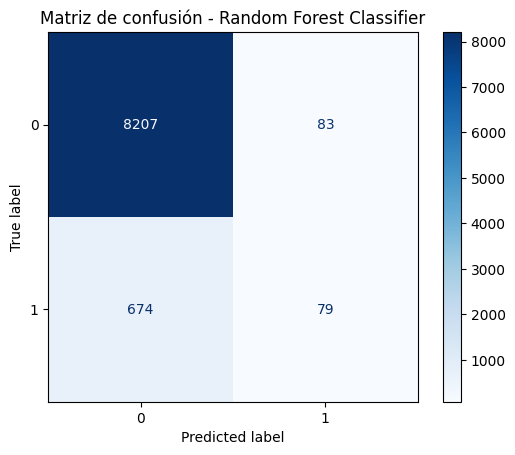

In [213]:
evaluar_modelo_B("Random Forest Classifier", y_test_B, y_pred_rfc_b, tiempo_rfc_b)

### 9.14. KNN

In [214]:
if False:
	knn_amplio = KNeighborsClassifier()

	param_grid_amplio = {
		'n_neighbors': [1, 10, 20],
		'weights': ['uniform', 'distance'],
		'metric': ['euclidean', 'manhattan', 'minkowski']
	}

	grid_search_amplio = GridSearchCV(
		estimator=knn_amplio,
		param_grid=param_grid_amplio,
		cv=5,
		scoring='f1',
		n_jobs=-1,      # usar todos los núcleos
		verbose=2
	)

	grid_search_amplio.fit(X_train_res_B, y_train_res_B)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_search_amplio.best_params_)

In [215]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 2, 3],
    'weights': ['uniform'],
    'metric': ['manhattan']
}

# Crear Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Entrenar el GridSearchCV
inicio = time.time()
grid_search.fit(X_train_res_B, y_train_res_B)
fin = time.time()

# Obtener el mejor modelo
best_model_knn_b = grid_search.best_estimator_
# Predecir en el conjunto de prueba
y_pred_knn_b = best_model_knn_b.predict(X_test_B_preprocessed)

print("Mejores hiperparámetros:", grid_search.best_params_)

tiempo_knn_b = fin - inicio

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


=== KNN ===
              precision    recall  f1-score   support

           0     0.9215    0.9136    0.9176      8290
           1     0.1311    0.1434    0.1370       753

    accuracy                         0.8495      9043
   macro avg     0.5263    0.5285    0.5273      9043
weighted avg     0.8557    0.8495    0.8526      9043

Tiempo de entrenamiento: 12.6548 segundos


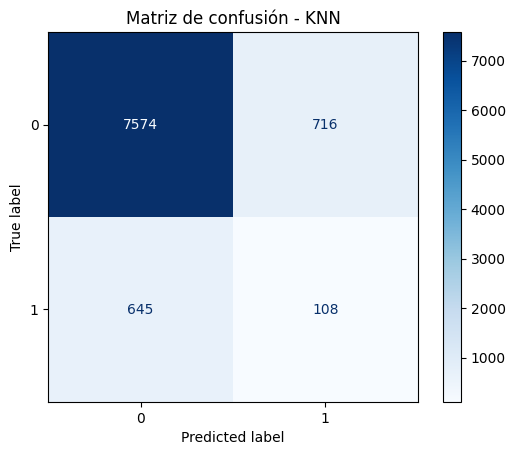

In [216]:
evaluar_modelo_B("KNN", y_test_B, y_pred_knn_b, tiempo_knn_b)

### 9.15. Naive Bayes

In [217]:
nb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Crear Grid Search
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
inicio = time.time()
grid_search.fit(X_train_res_B, y_train_res_B)
fin = time.time()

print(grid_search.best_params_)

# Extraer mejor modelo
best_model_nb_b = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_nb_b = best_model_nb_b.predict(X_test_B_preprocessed)

tiempo_nb_b = fin - inicio

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'var_smoothing': 0.0001}


=== Naive Bayes ===
              precision    recall  f1-score   support

           0     0.9582    0.6531    0.7768      8290
           1     0.1524    0.6866    0.2494       753

    accuracy                         0.6559      9043
   macro avg     0.5553    0.6698    0.5131      9043
weighted avg     0.8911    0.6559    0.7328      9043

Tiempo de entrenamiento: 0.4439 segundos


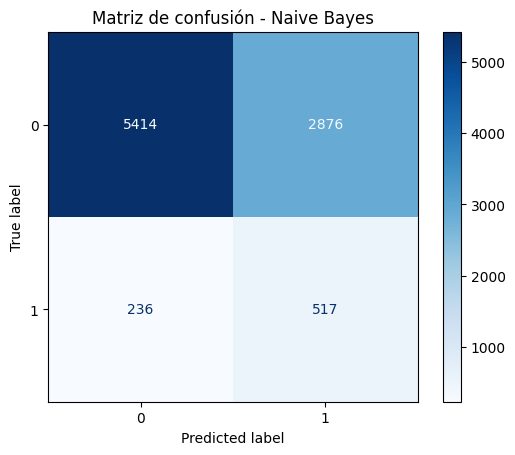

In [218]:
evaluar_modelo_B("Naive Bayes", y_test_B, y_pred_nb_b, tiempo_nb_b)

### 9.16. Support Vector Machines

In [219]:
if False:
	param_grid_amplio = {'C': [0.01, 0.1, 1, 10, 20]}

	grid_svc_amplio = GridSearchCV(
		estimator=LinearSVC(random_state=42),
		param_grid=param_grid_amplio,
		scoring='f1',
		cv=3,
		n_jobs=1
	)

	grid_svc_amplio.fit(X_train_res_B, y_train_res_B)

	# Mejor modelo
	print("Mejores hiperparámetros:", grid_svc_amplio.best_params_)

In [220]:
param_grid = {'C': [18, 20, 24, 28, 32]}

grid_svc = GridSearchCV(
    estimator=LinearSVC(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=1
)

inicio = time.time()
grid_svc.fit(X_train_res_B, y_train_res_B)
fin = time.time()

best_svc_b = grid_svc.best_estimator_
y_pred_svc_b = best_svc_b.predict(X_test_B_preprocessed)

print("Mejor parámetro:", grid_svc.best_params_)

tiempo_svc_b = fin - inicio

Mejor parámetro: {'C': 20}


=== SVM Lineal (SMOTE) ===
              precision    recall  f1-score   support

           0     0.9607    0.6602    0.7826      8290
           1     0.1581    0.7025    0.2581       753

    accuracy                         0.6637      9043
   macro avg     0.5594    0.6814    0.5203      9043
weighted avg     0.8939    0.6637    0.7389      9043

Tiempo de entrenamiento: 2.6987 segundos


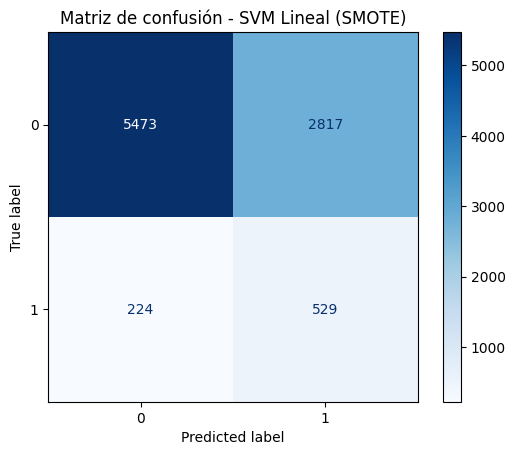

In [221]:
evaluar_modelo_B("SVM Lineal (SMOTE)", y_test_B, y_pred_svc_b, tiempo_svc_b)

### 9.17. MLP

In [222]:
if False:
	hidden_layer_options = [
		(50,),
		(100,),
		(100, 50),
		(100, 50, 25),
		(150, 75),
		(200, 100, 50)
	]

	activation_options = ['relu', 'tanh']
	solver_options = ['adam']
	learning_rates = [0.001, 0.0005, 0.0001]

	# -------------------------------------------------------------------
	# BÚSQUEDA DE TODAS LAS COMBINACIONES
	# -------------------------------------------------------------------
	best_f1 = 0
	best_params = None

	total_tests = len(hidden_layer_options) * len(activation_options) * len(solver_options) * len(learning_rates)
	print(f"\nProbando {total_tests} combinaciones...\n")

	for hls, act, solv, lr in itertools.product(hidden_layer_options, activation_options, solver_options, learning_rates):

		print(f"Probando: hidden={hls}, activation={act}, solver={solv}, lr={lr}")

		mlp = MLPClassifier(
			hidden_layer_sizes=hls,
			activation=act,
			solver=solv,
			learning_rate_init=lr,
			max_iter=500,
			random_state=42
		)

		mlp.fit(X_train_A_preprocessed, y_train_A)
		y_pred = mlp.predict(X_test_A_preprocessed)
		f1 = f1_score(y_test_A, y_pred, pos_label=1)  # F1 para la clase 1

		print(f" → F1 (clase 1): {f1:.4f}\n")

		if f1 > best_f1:
			best_f1 = f1
			best_params = (hls, act, solv, lr)

	# -------------------------------------------------------------------
	# RESULTADOS FINALES
	# -------------------------------------------------------------------
	print("========================================")
	print("MEJOR COMBINACIÓN ENCONTRADA:")
	print("Hidden layers:", best_params[0])
	print("Activation:", best_params[1])
	print("Solver:", best_params[2])
	print("Learning rate:", best_params[3])
	print(f"F1 (clase 1): {best_f1:.4f}")
	print("========================================")

In [223]:
mlp_b = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

inicio = time.time()
mlp_b.fit(X_train_res_A, y_train_res_A)
fin = time.time()

y_pred_mlp_b = mlp_b.predict(X_test_A_preprocessed)

tiempo_mlp_b = fin - inicio

=== MLP ===
              precision    recall  f1-score   support

           0     0.9158    0.7946    0.8509      8290
           1     0.0795    0.1952    0.1129       753

    accuracy                         0.7447      9043
   macro avg     0.4976    0.4949    0.4819      9043
weighted avg     0.8461    0.7447    0.7894      9043

Tiempo de entrenamiento: 473.3022 segundos


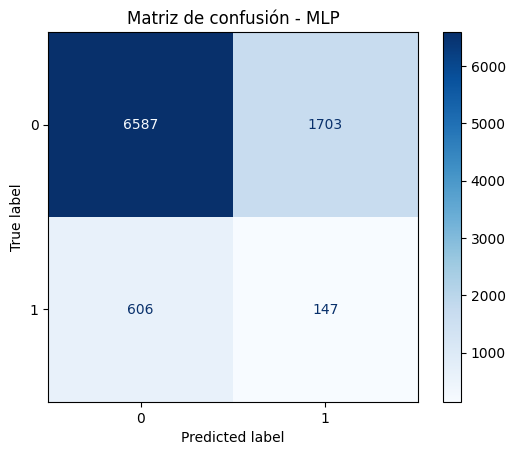

In [224]:
evaluar_modelo_B("MLP", y_test_B, y_pred_mlp_b, tiempo_mlp_b)

### 9.18. XGB Classifier

In [225]:
model = XGBClassifier(
    scale_pos_weight = (len(y_train_res_B) - sum(y_train_res_B)) / sum(y_train_res_B),  # peso automático
    eval_metric="logloss"
)

inicio = time.time()
model.fit(X_train_res_B, y_train_res_B)
fin = time.time()

y_pred_gxb_b = model.predict(X_test_B_preprocessed)
tiempo_xgb_b = fin - inicio

print("Mejor parámetro:", grid_svc.best_params_)

Mejor parámetro: {'C': 20}


=== XGB Classifier ===
              precision    recall  f1-score   support

           0     0.9222    0.9912    0.9555      8290
           1     0.4511    0.0797    0.1354       753

    accuracy                         0.9153      9043
   macro avg     0.6867    0.5354    0.5455      9043
weighted avg     0.8830    0.9153    0.8872      9043

Tiempo de entrenamiento: 0.5006 segundos


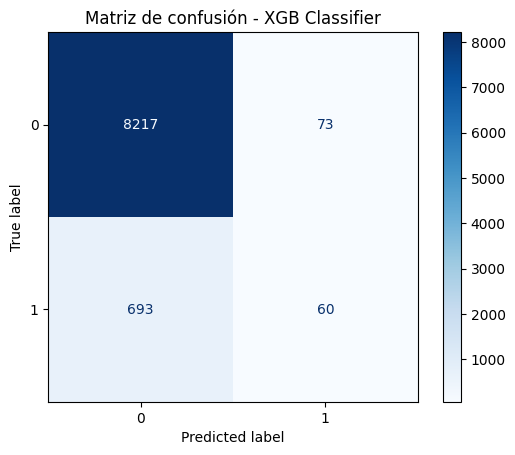

In [226]:
evaluar_modelo_B("XGB Classifier", y_test_B, y_pred_gxb_b, tiempo_xgb_b)

### 9.19. LightGBM

In [227]:
if False:
    lgbm = LGBMClassifier(random_state=42)

    # Definir la rejilla de hiperparámetros para LightGBM
    param_grid_amplio = {
        'n_estimators': [180, 200, 220],
        'max_depth': [4, 6, 8, 10],
        'learning_rate': [0.1, 0.05, 0.01],
        'subsample': [0.6, 0.8, 1],          # fracción de muestras usadas en cada iteración
        'colsample_bytree': [0.6, 0.8, 1.0]         # fracción de features usadas en cada árbol
    }

    # Configurar Grid Search para optimizar F1-score
    grid_search_amplio_lgbm = GridSearchCV(
        estimator=lgbm,
        param_grid=param_grid_amplio,
        cv=5,
        scoring='f1',
        n_jobs=-1,       # usar todos los núcleos
        verbose=2
    )

    grid_search_amplio_lgbm.fit(X_train_res_A, y_train_res_A)

    # Mejor modelo
    print("Mejores hiperparámetros:", grid_search_amplio_lgbm.best_params_)

In [228]:
lgbm_b = LGBMClassifier(
    objective='binary',
    metric='binary_logloss'
)

param_grid = {
    'n_estimators': [200, 220, 240],
    'max_depth': [6, 8, 10],                  # probar un poco más profundo o menos
    'learning_rate': [0.05, 0.1, 0.15],     # tasas de aprendizaje cercanas
    'subsample': [0.6, 0.7, 0.8],           # ligeros cambios en muestreo de filas
    'colsample_bytree': [0.6, 0.7, 0.8]          # probar un poco menos de features
}

# Grid search
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_b,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
inicio = time.time()
grid_search_lgbm.fit(X_train_res_B, y_train_res_B)
fin = time.time()

# Extraer el mejor modelo
best_model_lgbm_b = grid_search_lgbm.best_estimator_

# Predicción
y_pred_lgbm_b = best_model_lgbm_b.predict(X_test_B_preprocessed)


# Tiempo
tiempo_lgbm_b = fin - inicio

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Number of positive: 33155, number of negative: 33155
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,006241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 66310, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000


C:\Users\albam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM Classifier ===
              precision    recall  f1-score   support

           0     0.9230    0.9940    0.9572      8290
           1     0.5690    0.0876    0.1519       753

    accuracy                         0.9185      9043
   macro avg     0.7460    0.5408    0.5545      9043
weighted avg     0.8936    0.9185    0.8901      9043

Tiempo de entrenamiento: 572.6803 segundos


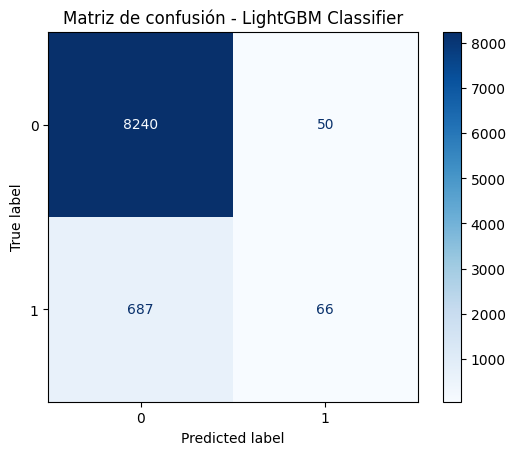

In [229]:
evaluar_modelo_B("LightGBM Classifier", y_test_B, y_pred_lgbm_b, tiempo_lgbm_b)

### 9.19. Conclusión

Durante el entrenamiento de los diversos modelos nos hemos encontrado con dos grandes problemas, el primer problema surgio  durante el entrenamiento de los modelos y es que el tiempo de entrenamiento de estos mismos en algunos casos era excesivamente largo llegando a tardar varias horas, debido a ello en el caso del modelo SVM original se ha tenido que usar el modelo LinearSVM, otro cambio que se ha realizado ha sido cambiar el método de encoding de las variables categóricas de One-Hot Encoding a Target Encoding, este cambio mejoro los tiempos de entrenamiento y de manera general tambien mejoro lás métricas de los modelos. Otras estrategia usada tanto para mejorar el rendimiento como el resultado de los modelos ha sido una optimización en dos pasos, en el primer paso se realiza una optimización con unos parámetro más amplios y en el segundo paso centrarnos en optimizar solo algunos de los parámetros y optimizarlos con valores cercanos a los ganadores del primer paso para afinar más la optmización.

El otro problema encontrado fue el bajo desempeño de los modelos, estos tuvieron f1-scores muy bajos, esto se debe al desbalanceo de las variables objetivo y a la poca relación entre las variables del dataset y la variable bjetivo, esto se analiza más en detalle en el siguiente punto.

---

## 🔟 **Evaluación de modelos**
Se analizan:
- Matriz de confusión  
- Classification report
- Tiempo de predicción

El objetivo es seleccionar el modelo más robusto para la segmentación de clientes.

In [268]:
predicciones_A = {}
predicciones_B = {}

predicciones_A["Logistic Regression"] = y_pred_lr_a
#predicciones_A["Desicio Tree Classifier"] = y_pred_dtc_a
#predicciones_A["Random Forest Classifier"] = y_pred_rfc_a
#predicciones_A["KNN"] = y_pred_knn_a
#predicciones_A["Naive Bayes"] = y_pred_nb_a
predicciones_A["Lineal SVM"] = y_pred_svc_a
predicciones_A["MLP"] = y_pred_mlp_a
#predicciones_A["XGB Classifier"] = y_pred_xgb_a
#predicciones_A["LightGBM Classifier"] = y_pred_lgbm_a

predicciones_B["Logistic Regression"] = y_pred_lr_b
# predicciones_B["Desicio Tree Classifier"] = y_pred_dtc_b
# predicciones_B["Random Forest Classifier"] = y_pred_rfc_b
# predicciones_B["KNN"] = y_pred_knn_b
predicciones_B["Naive Bayes"] = y_pred_nb_b
predicciones_B["Lineal SVM"] = y_pred_svc_b
# predicciones_B["MLP"] = y_pred_mlp_b
# predicciones_B["XGB Classifier"] = y_pred_gxb_b
# predicciones_B["LightGBM Classifier"] = y_pred_lgbm_b

In [269]:
def comparar_matrices_confusion(y_true, predicciones_dict):
    modelos = list(predicciones_dict.keys())
    num_modelos = len(modelos)

    # Crear cuadrícula cuadrada (ej: 2×2, 3×3...)
    cols = 3
    rows = math.ceil(num_modelos / cols)

    plt.figure(figsize=(6 * cols, 5 * rows))

    for i, modelo in enumerate(modelos, 1):
        y_pred = predicciones_dict[modelo]
        cm = confusion_matrix(y_true, y_pred)

        plt.subplot(rows, cols, i)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues", ax=plt.gca(), colorbar=False)
        plt.title(modelo)

    plt.tight_layout()
    plt.show()

## 🟩 Escenario A — `Patrimonio_Alto`

In [271]:
df_resultados = pd.DataFrame(resultados_A).T  # .T para transponer
display(df_resultados)

,accuracy,precision_1,recall_1,f1_1,tiempo_entrenamiento
Logistic Regression,0.634082,0.154950,0.597345,0.246070,4.708061
Decision Tree Classifier,0.866084,0.205374,0.118363,0.150175,3.048601
Random Forest Classifier,0.893509,0.189474,0.019912,0.036036,322.936453
KNN,0.790224,0.130855,0.194690,0.156514,11.882062
Naive Bayes,0.418224,0.126522,0.816372,0.219089,5.413093
SVM Lineal (SMOTE),0.637952,0.155523,0.591814,0.246317,2.675322
MLP,0.758045,0.152973,0.313053,0.205519,395.581053
XGB Classifier,0.899259,0.360000,0.009956,0.019376,14.941390
LightGBM Classifier,0.898817,0.210526,0.004425,0.008667,232.574883


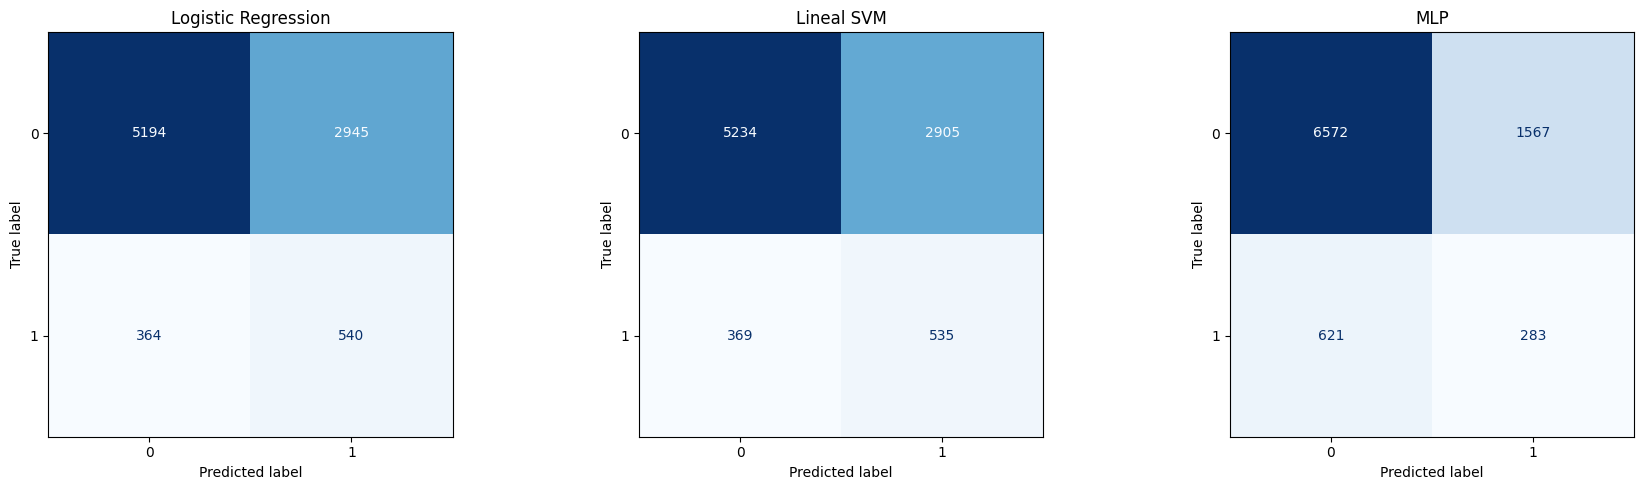

In [272]:
comparar_matrices_confusion(y_test_A, predicciones_A)

Como se puede observar, el rendimiento de los modelos presenta una gran variabilidad, con accuracies que van desde 0.418224 (Naive Bayes) hasta 0.898706 (XGB Classifier). En general, los modelos obtienen una precisión global relativamente buena, aunque esta métrica por sí sola resulta poco representativa debido al fuerte desbalance de la variable objetivo.

Si analizamos la métrica clave para este problema —el F1-score de la clase 1 (personas en el percentil 90)—, el desempeño es claramente insuficiente. Los valores oscilan entre 0.008658 (XGB Classifier) y 0.246260 (SVM Lineal). Incluso el mejor resultado obtenido se considera bajo. Esto se explica al observar que tanto la precisión como el recall para la clase 1 presentan valores reducidos en la mayoría de modelos; en la práctica, muchos clasificadores tienden a predecir casi todos los casos como clase 0.
Un caso particular es Naive Bayes, que presenta un recall alto, pero aun así no alcanza un F1-score competitivo debido a su baja precisión.

Estos problemas, ya mencionados anteriormente, derivan directamente del desbalance severo del dataset. Debido a que la clase 1 representa un porcentaje muy reducido de los datos, los modelos pueden clasificar casi todas las instancias como 0 y aun así obtener un accuracy elevado (como ocurre con Random Forest). Para mejorar el rendimiento real en la clase minoritaria, sería necesario aplicar estrategias adicionales de balanceo, como técnicas de oversampling/undersampling más avanzadas, ajuste de umbrales, o modelos específicamente diseñados para tratar datos desbalanceados.

### Conclusión Escenario A

El modelo que ha tenido un mejor desempeño para este escenario es el SVM linear muy cerca de Lineal Regression. Este es el modelo que ha conseguido un mayor f1-score, además tiene la segunda mayor accuracy de los modelos con un f1-score por encima de 0,2, de este modelo se puede desatcar también su extrema rapidez entrenandose en solo 3 segundas, el tercer menor tiempo de ejecución. Por todos los motivos mencionados este es el modelo seleccionado para el escenario A.

## 🟥 Escenario B: `Riesgo_Sobregiro`

In [273]:
df_resultados = pd.DataFrame(resultados_B).T  # .T para transponer
display(df_resultados)

,accuracy,precision_1,recall_1,f1_1,tiempo_entrenamiento
Logistic Regression,0.668694,0.159222,0.695883,0.259149,2.027283
Decision Tree Classifier,0.887427,0.208791,0.126162,0.157285,1.756359
Random Forest Classifier,0.916289,0.487654,0.104914,0.172678,89.442357
KNN,0.849497,0.131068,0.143426,0.136969,12.654814
Naive Bayes,0.655866,0.152373,0.686587,0.249397,0.443902
SVM Lineal (SMOTE),0.663718,0.158099,0.702523,0.258112,2.698658
MLP,0.744664,0.079459,0.195219,0.112947,473.302156
XGB Classifier,0.915294,0.451128,0.079681,0.135440,0.500605
LightGBM Classifier,0.918500,0.568966,0.087649,0.151899,572.680259


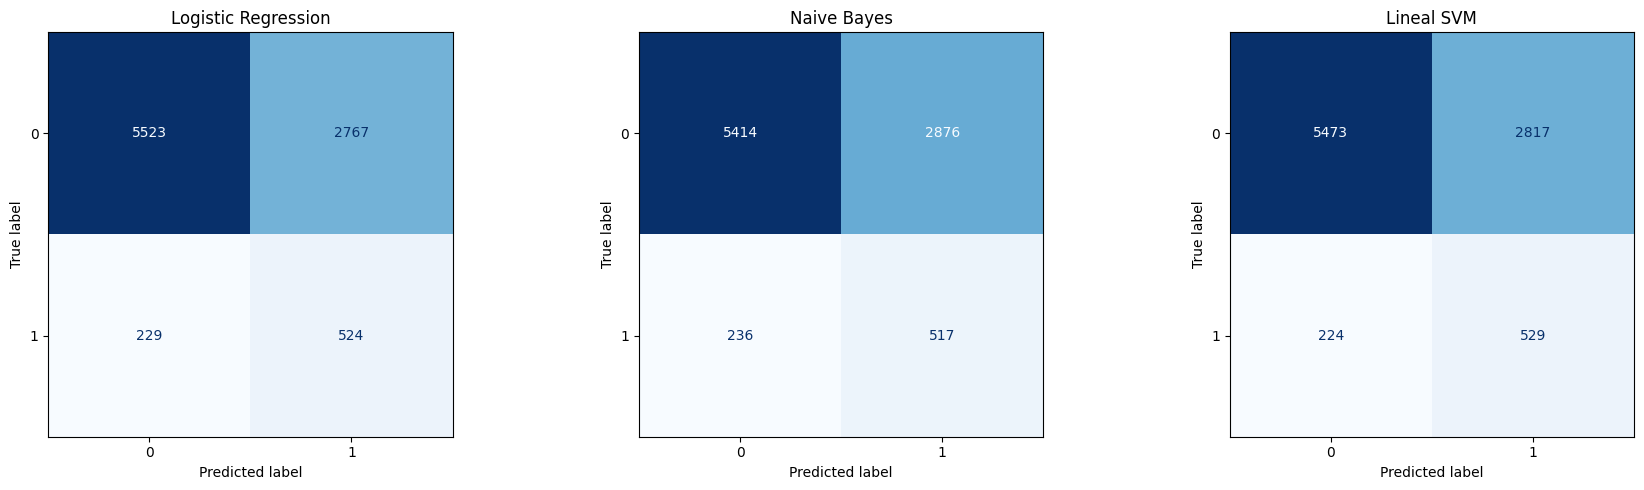

In [274]:
comparar_matrices_confusion(y_test_B, predicciones_B)

Como se observa en la tabla, el rendimiento de los modelos muestra una variabilidad considerable, con accuracies que van desde 0.655866 (Naive Bayes) hasta 0.916289 (Random Forest). Sin embargo, esta métrica resulta poco informativa debido al fuerte desbalance de la variable objetivo: un modelo puede obtener una accuracy muy alta prediciendo casi todo como clase 0.

Al centrarnos en la métrica realmente relevante, el F1-score de la clase 1, que refleja el equilibrio entre precisión y recall en la clase minoritaria, el desempeño general sigue siendo limitado. Los valores van desde 0.118068 (MLP) hasta 0.259149 (Logistic Regression), y aunque este último es el mejor resultado, sigue siendo bajo para un problema de clasificación práctica.

La razón principal es que tanto la precisión como el recall de la clase 1 son reducidos en la mayoría de modelos. Algunos clasificadores, como Logistic Regression o SVM Lineal (SMOTE), logran recalls relativamente altos (≈0.69–0.70), pero lo hacen sacrificando la precisión, lo que limita el F1-score final. Otros modelos como Random Forest y XGB alcanzan altas accuracies globales, pero prácticamente no identifican a la clase 1 (recalls de 0.10 y 0.07), lo que demuestra que su buen rendimiento general proviene únicamente de predecir mayoritariamente la clase mayoritaria.

En resumen, los resultados confirman nuevamente que el desbalance severo del dataset sigue siendo el factor determinante que limita el rendimiento de todos los modelos.

### Conclusión Escenario B

Escogemos Logistic Regression como modelo final porque ofrece el mejor equilibrio entre desempeño y eficiencia. Aunque comparte un F1-score muy similar al de SVM, presenta un coste computacional significativamente menor, lo que lo convierte en una opción más práctica para un entorno real.

Además, muestra el mejor balance entre precision y recall, logrando identificar una parte relevante de la clase 1 sin generar tantos falsos positivos como otros modelos evaluados.

Por último, su rendimiento se mantiene estable, mientras que modelos más complejos —como Random Forest, MLP o XGBoost— no aportan mejoras reales en las métricas clave para este problema. Por ello, Logistic Regression se posiciona como la alternativa más adecuada para este caso de uso.

## 1️⃣1️⃣ **Variables más importantes del mejor modelo**

## 🟩 Escenario A — `Patrimonio_Alto`

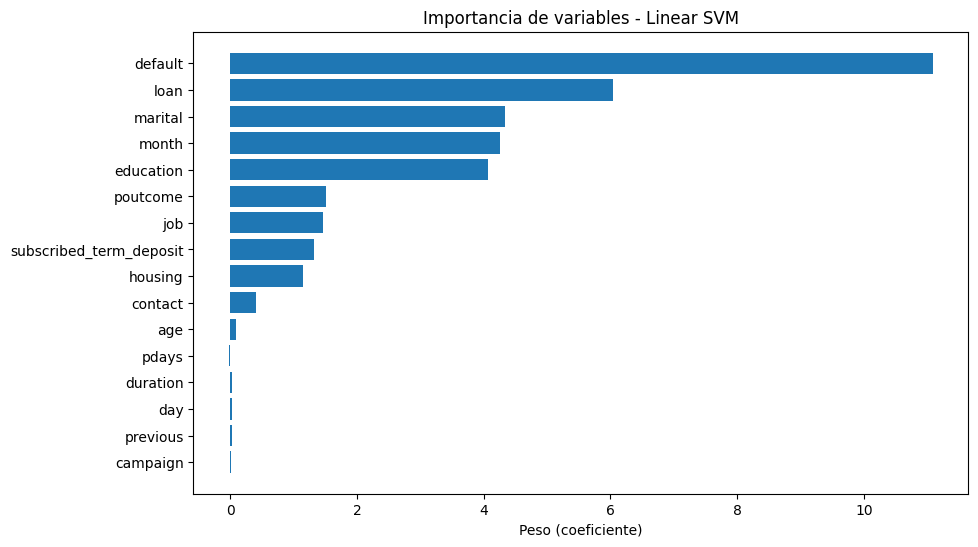

In [236]:
all_features = list(num_features) + list(cat_features)

coefs = best_svc_a.coef_[0]
indices = np.argsort(np.abs(coefs))[::-1]

plt.figure(figsize=(10,6))
plt.barh([all_features[i] for i in indices], coefs[indices])
plt.xlabel("Peso (coeficiente)")
plt.title("Importancia de variables - Linear SVM")
plt.gca().invert_yaxis()
plt.show()

- Variables más Influyentes:

  La variable default (si el cliente tiene impagos en créditos anteriores) es, por mucho, la variable más importante para el modelo. Su peso es significativamente superior al resto.

  Le siguen, en orden de importancia, loan (si tiene un préstamo personal), marital (estado civil), month (el mes en que se contactó al cliente), housing (si tiene una hipoteca) y education (nivel educativo). Estas variables tienen un peso considerable en la decisión del clasificador.

- Variables Menos Influyentes (o Irrelevantes):

  La mayoría de las variables tienen una importancia muy baja o casi nula (cercana a cero).

  Las variables campaign, previous, day, duration, pdays, y age son las que menos contribuyen a la capacidad predictiva del modelo Linear SVM.

Dado que muchas variables tienen una importancia mínima, se podría considerar la eliminación de las variables con menor peso (como campaign, previous, day, etc.) para simplificar el modelo sin sacrificar significativamente el rendimiento.

## 🟥 Escenario B: `Riesgo_Sobregiro`

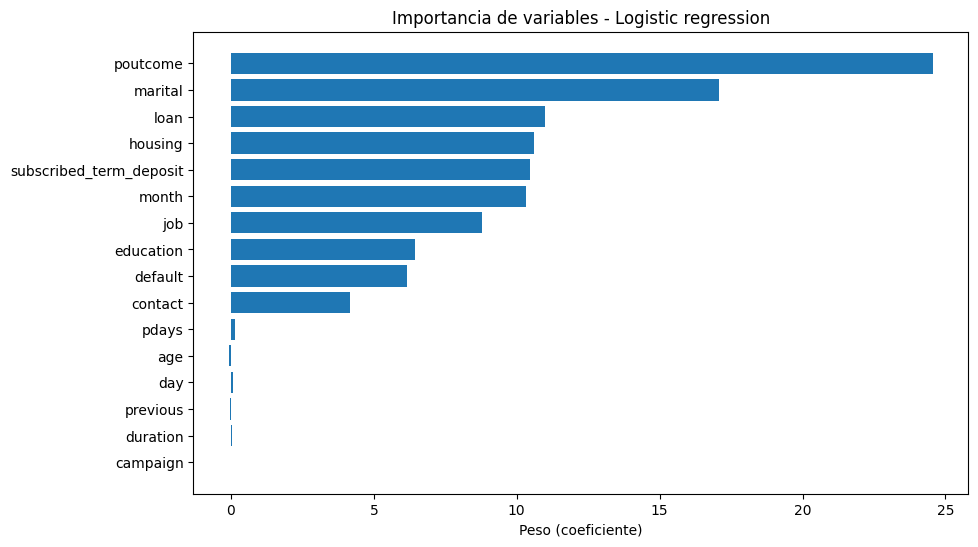

In [237]:
all_features = list(num_features) + list(cat_features)

coefs = best_lr_b.coef_[0]
indices = np.argsort(np.abs(coefs))[::-1]

plt.figure(figsize=(10,6))
plt.barh([all_features[i] for i in indices], coefs[indices])
plt.xlabel("Peso (coeficiente)")
plt.title("Importancia de variables - Logistic regression")
plt.gca().invert_yaxis()
plt.show()

- Variables Más Influyentes (Logistic Regression):

  poutcome: Esta es la variable más importante y domina la predicción para la Regresión Logística, con un peso mucho mayor que cualquier otra característica.

  marital, loan, housing, subscribed_term_deposit y month: Estas variables también muestran una alta influencia, pero con una brecha considerable respecto a poutcome.

- Variables de Poca o Nula Influencia:

  Al igual que con el SVM, la Regresión Logística asigna una importancia casi nula a variables como campaign, duration, previous y day.

## 1️⃣2️⃣ Estudios relevantes con las variables más importantes de los mejores modelos

#### 🔹 ESCENARIO A — Target: Patrimonio_Alto

1. Variables de riesgo: `default`, `loan`, `housing`

    **Objetivo**: ver la tasa de clientes con Patrimonio_Alto = 1 en cada categoría.

In [254]:
vars_riesgo = ["default", "loan", "housing"]

for var in vars_riesgo:
    print(f"\n==== {var.upper()} ====")
    tabla = (
        df
        .groupby(var)["Patrimonio_Alto"]
        .agg(
            tasa_patrimonio_alto="mean",
            total_clientes="count"
        )
        .reset_index()
    )
    # Convertimos a porcentaje
    tabla["tasa_patrimonio_alto"] = (tabla["tasa_patrimonio_alto"] * 100).round(2)
    display(tabla)



==== DEFAULT ====


,default,tasa_patrimonio_alto,total_clientes
0,no,10.18,44396
1,yes,0.37,815



==== LOAN ====


,loan,tasa_patrimonio_alto,total_clientes
0,no,10.95,37967
1,yes,5.00,7244



==== HOUSING ====


,housing,tasa_patrimonio_alto,total_clientes
0,no,11.70,20081
1,yes,8.64,25130


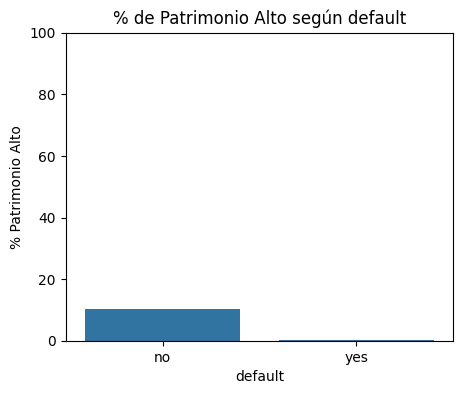

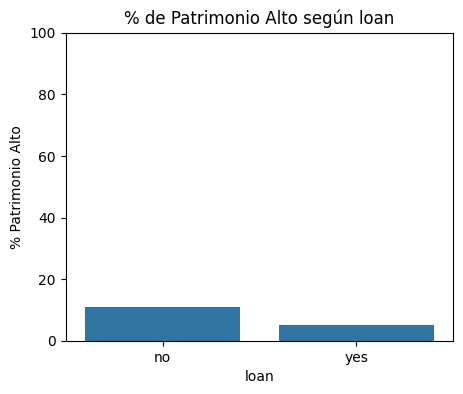

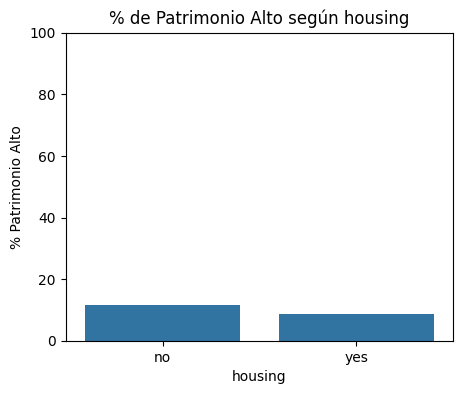

In [255]:
for var in vars_riesgo:
    plt.figure(figsize=(5,4))
    tabla = (
        df
        .groupby(var)["Patrimonio_Alto"]
        .mean()
        .reset_index()
    )
    tabla["Patrimonio_Alto"] = tabla["Patrimonio_Alto"] * 100

    sns.barplot(data=tabla, x=var, y="Patrimonio_Alto")
    plt.ylabel("% Patrimonio Alto")
    plt.title(f"% de Patrimonio Alto según {var}")
    plt.ylim(0, 100)
    plt.show()

2. “Eslabón de riqueza”: job, education, marital

    **Objetivo**: ver qué profesiones, niveles educativos y estados civiles se asocian más a alto patrimonio.

In [256]:
vars_soc = ["job", "education", "marital"]

for var in vars_soc:
    print(f"\n==== {var.upper()} ====")
    tabla = (
        df
        .groupby(var)["Patrimonio_Alto"]
        .agg(
            tasa_patrimonio_alto="mean",
            total_clientes="count"
        )
        .reset_index()
    )
    tabla["tasa_patrimonio_alto"] = (tabla["tasa_patrimonio_alto"] * 100).round(2)
    tabla = tabla.sort_values("tasa_patrimonio_alto", ascending=False)
    display(tabla)



==== JOB ====


,job,tasa_patrimonio_alto,total_clientes
5,retired,14.89,2264
4,management,13.58,9458
11,unknown,13.19,288
6,self-employed,11.78,1579
10,unemployed,11.05,1303
3,housemaid,10.81,1240
8,student,9.70,938
2,entrepreneur,9.62,1487
9,technician,9.29,7597
0,admin.,8.08,5171



==== EDUCATION ====


,education,tasa_patrimonio_alto,total_clientes
2,tertiary,13.26,13301
3,unknown,11.47,1857
0,primary,9.47,6851
1,secondary,8.17,23202



==== MARITAL ====


,marital,tasa_patrimonio_alto,total_clientes
1,married,10.60,27214
2,single,9.37,12790
0,divorced,8.39,5207


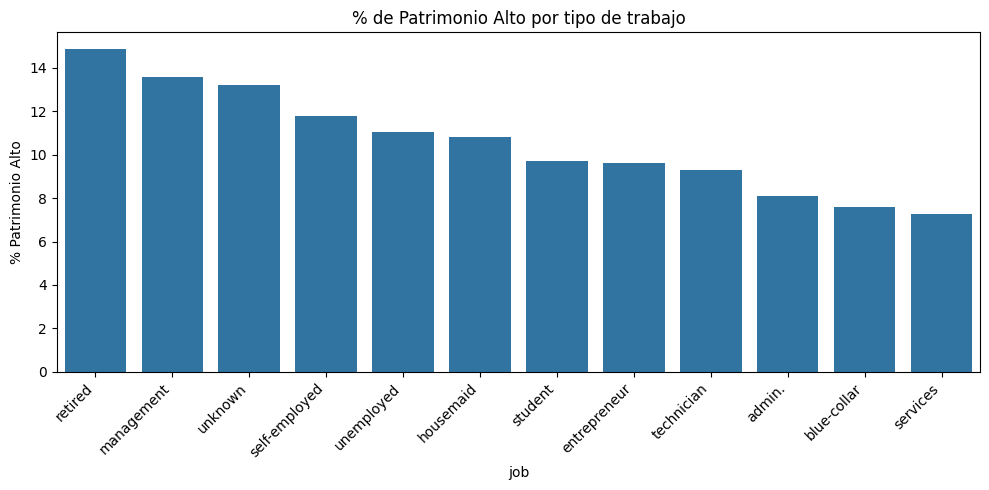

In [257]:
plt.figure(figsize=(10,5))
tabla_job = (
    df
    .groupby("job")["Patrimonio_Alto"]
    .mean()
    .reset_index()
)
tabla_job["Patrimonio_Alto"] = tabla_job["Patrimonio_Alto"] * 100
tabla_job = tabla_job.sort_values("Patrimonio_Alto", ascending=False)

sns.barplot(data=tabla_job, x="job", y="Patrimonio_Alto")
plt.xticks(rotation=45, ha="right")
plt.ylabel("% Patrimonio Alto")
plt.title("% de Patrimonio Alto por tipo de trabajo")
plt.tight_layout()
plt.show()

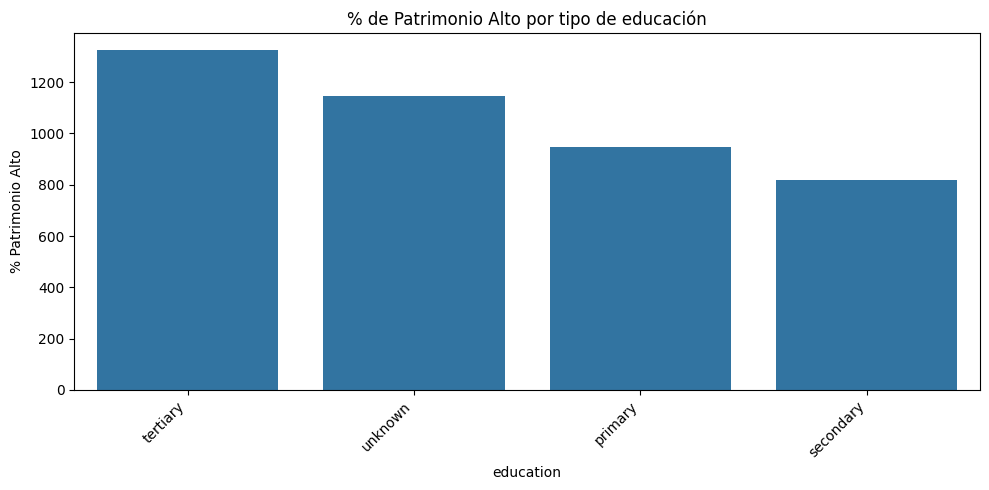

In [277]:
plt.figure(figsize=(10,5))
tabla_education = (
    df
    .groupby("education")["Patrimonio_Alto"]
    .mean()
    .reset_index()
)
tabla_education["Patrimonio_Alto"] = tabla_job["Patrimonio_Alto"] * 100
tabla_education = tabla_education.sort_values("Patrimonio_Alto", ascending=False)

sns.barplot(data=tabla_education, x="education", y="Patrimonio_Alto")
plt.xticks(rotation=45, ha="right")
plt.ylabel("% Patrimonio Alto")
plt.title("% de Patrimonio Alto por tipo de educación")
plt.tight_layout()
plt.show()

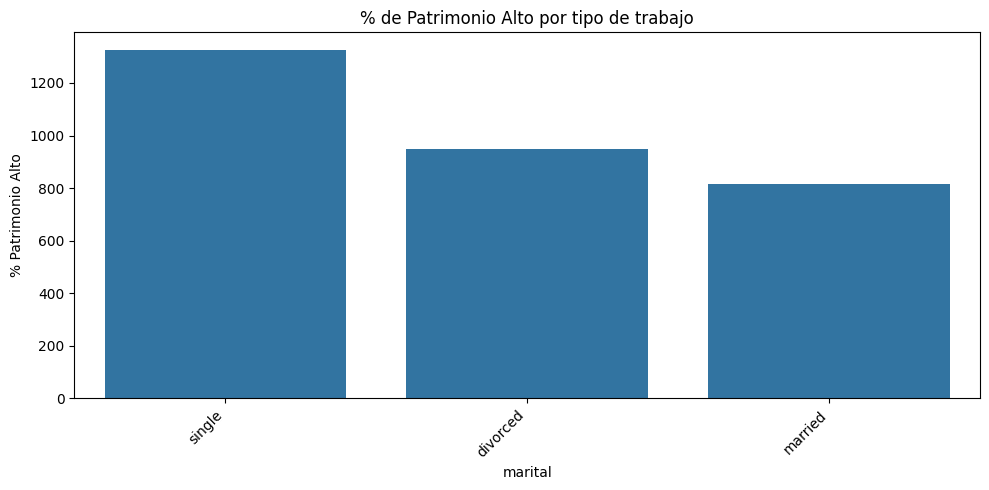

In [278]:
plt.figure(figsize=(10,5))
tabla_marital = (
    df
    .groupby("marital")["Patrimonio_Alto"]
    .mean()
    .reset_index()
)
tabla_marital["Patrimonio_Alto"] = tabla_job["Patrimonio_Alto"] * 100
tabla_marital = tabla_marital.sort_values("Patrimonio_Alto", ascending=False)

sns.barplot(data=tabla_marital, x="marital", y="Patrimonio_Alto")
plt.xticks(rotation=45, ha="right")
plt.ylabel("% Patrimonio Alto")
plt.title("% de Patrimonio Alto por tipo de trabajo")
plt.tight_layout()
plt.show()

3. Estrategia de contacto: month y poutcome (aplicado a Escenario A)

3.1. Mes de contacto (month vs Patrimonio_Alto)

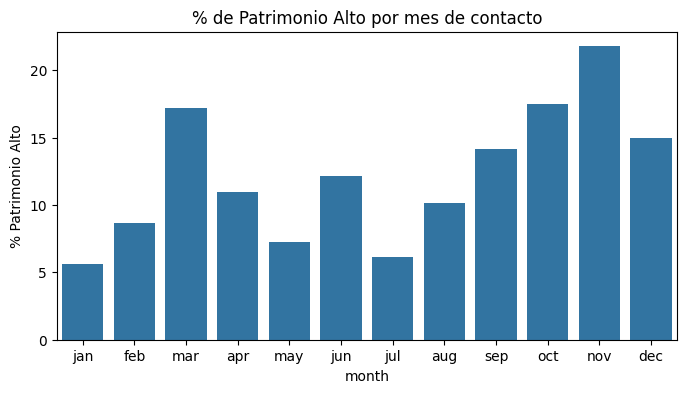

In [258]:
orden_meses = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

tabla_month = (
    df
    .groupby("month")["Patrimonio_Alto"]
    .mean()
    .reset_index()
)
tabla_month["Patrimonio_Alto"] = tabla_month["Patrimonio_Alto"] * 100
tabla_month["month"] = pd.Categorical(tabla_month["month"], categories=orden_meses, ordered=True)
tabla_month = tabla_month.sort_values("month")

plt.figure(figsize=(8,4))
sns.barplot(data=tabla_month, x="month", y="Patrimonio_Alto")
plt.ylabel("% Patrimonio Alto")
plt.title("% de Patrimonio Alto por mes de contacto")
plt.show()

3.2. Historial de interacción anterior (poutcome vs Patrimonio_Alto)

In [259]:
tabla_pout = (
    df
    .groupby("poutcome")["Patrimonio_Alto"]
    .agg(
        tasa_patrimonio_alto="mean",
        total_clientes="count"
    )
    .reset_index()
)
tabla_pout["tasa_patrimonio_alto"] = (tabla_pout["tasa_patrimonio_alto"] * 100).round(2)
tabla_pout = tabla_pout.sort_values("tasa_patrimonio_alto", ascending=False)
display(tabla_pout)


,poutcome,tasa_patrimonio_alto,total_clientes
2,success,14.36,1511
0,failure,11.08,4901
1,other,10.65,1840
3,unknown,9.65,36959


4. Conexión con el objetivo original: Patrimonio_Alto vs subscribed_term_deposit

    **Objetivo**: ver si los clientes con patrimonio alto son los que más contratan el depósito a plazo (subscribed_term_deposit del dataset original).

In [260]:
tabla_term = pd.crosstab(
    df["subscribed_term_deposit"],
    df["Patrimonio_Alto"],
    normalize="index"
) * 100

tabla_term = tabla_term.rename(columns={0: "% Sin Patrimonio Alto", 1: "% Patrimonio Alto"})
display(tabla_term)

Patrimonio_Alto,% Sin Patrimonio Alto,% Patrimonio Alto
subscribed_term_deposit,,
no,90.501478,9.498522
yes,86.216676,13.783324


### 📌 Conclusión General del Escenario A — Patrimonio Alto

El análisis realizado muestra que los clientes con **Patrimonio Alto** presentan un perfil financiero muy estable. Las variables relacionadas con el riesgo —principalmente `default`, `loan` y `housing`— tienen un impacto claro: los clientes sin impagos y sin préstamos activos concentran las tasas más altas de patrimonio. Esto evidencia que la ausencia de deudas y un buen historial crediticio son factores fundamentales para la acumulación de capital.

En el ámbito sociodemográfico, se observa que los grupos con mayor nivel económico suelen pertenecer a profesiones como *management* o estar retirados, además de contar con niveles educativos superiores. Asimismo, las personas casadas muestran una ligera mayor presencia en el grupo de Patrimonio Alto, lo que puede relacionarse con una mayor estabilidad financiera general.

Las variables temporales también aportan información relevante. Algunos meses —especialmente noviembre, octubre y marzo— muestran una mayor concentración de clientes con Patrimonio Alto. Esto sugiere un posible efecto estacional, probablemente asociado a ciclos laborales, pagos de bonus o campañas específicas del sector bancario.

Finalmente, el análisis del historial de interacción (`poutcome`) y la relación con la contratación de un depósito a plazo indican que los clientes con mejor respuesta en campañas anteriores y aquellos que sí contratan productos de inversión presentan mayores probabilidades de pertenecer al grupo de mayor patrimonio. En conjunto, todos los análisis confirman los patrones detectados por el modelo predictivo y ofrecen una visión consistente y bien sustentada del perfil económico del cliente bancario.


#### 🔹ESCENARIO B — Target: Riesgo_Sobregiro

Aquí el mejor modelo fue Regresión Logística y las variables clave: poutcome, marital, loan, housing, subscribed_term_deposit, month.

1. Variables financieras y de relación: loan, housing, marital

In [262]:
vars_b = ["loan", "housing", "marital"]

for var in vars_b:
    print(f"\n==== {var.upper()} ====")
    tabla = (
        df
        .groupby(var)["Riesgo_Sobregiro"]
        .agg(
            tasa_sobregiro="mean",
            total_clientes="count"
        )
        .reset_index()
    )
    tabla["tasa_sobregiro"] = (tabla["tasa_sobregiro"] * 100).round(2)
    tabla = tabla.sort_values("tasa_sobregiro", ascending=False)
    display(tabla)



==== LOAN ====


,loan,tasa_sobregiro,total_clientes
1,yes,16.70,7244
0,no,6.73,37967



==== HOUSING ====


,housing,tasa_sobregiro,total_clientes
1,yes,10.90,25130
0,no,5.12,20081



==== MARITAL ====


,marital,tasa_sobregiro,total_clientes
0,divorced,11.06,5207
1,married,8.09,27214
2,single,7.72,12790


2. Estrategia de contacto: poutcome y month vs Riesgo_Sobregiro

,poutcome,tasa_sobregiro,total_clientes
3,unknown,8.87,36959
0,failure,7.02,4901
1,other,6.96,1840
2,success,1.06,1511


C:\Users\albam\AppData\Local\Temp\ipykernel_17244\2781368035.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("month")["Riesgo_Sobregiro"]


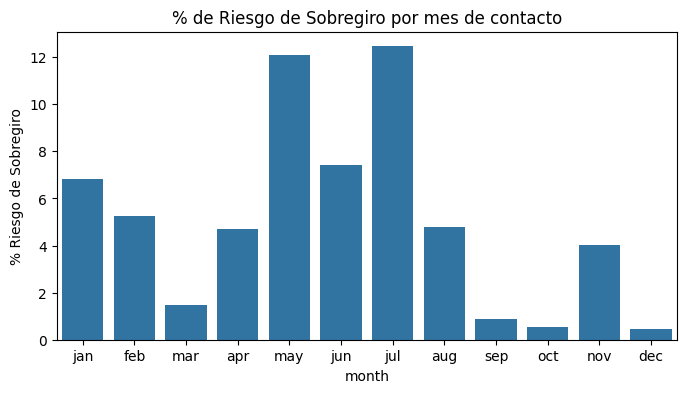

In [318]:
# poutcome
tabla_pout_b = (
    df
    .groupby("poutcome")["Riesgo_Sobregiro"]
    .agg(
        tasa_sobregiro="mean",
        total_clientes="count"
    )
    .reset_index()
)
tabla_pout_b["tasa_sobregiro"] = (tabla_pout_b["tasa_sobregiro"] * 100).round(2)
tabla_pout_b = tabla_pout_b.sort_values("tasa_sobregiro", ascending=False)
display(tabla_pout_b)

# month
tabla_month_b = (
    df
    .groupby("month")["Riesgo_Sobregiro"]
    .mean()
    .reset_index()
)
tabla_month_b["Riesgo_Sobregiro"] = tabla_month_b["Riesgo_Sobregiro"] * 100
tabla_month_b["month"] = pd.Categorical(tabla_month_b["month"], categories=orden_meses, ordered=True)
tabla_month_b = tabla_month_b.sort_values("month")

plt.figure(figsize=(8,4))
sns.barplot(data=tabla_month_b, x="month", y="Riesgo_Sobregiro")
plt.ylabel("% Riesgo de Sobregiro")
plt.title("% de Riesgo de Sobregiro por mes de contacto")
plt.show()

3. `Riesgo_Sobregiro` vs `subscribed_term_deposit`

    **Objetivo**: ver si quienes contratan el depósito a plazo tienen más/menos riesgo de sobregiro.

In [319]:
tabla_sobregiro_term = pd.crosstab(
    df["subscribed_term_deposit"],
    df["Riesgo_Sobregiro"],
    normalize="index"
) * 100

tabla_sobregiro_term = tabla_sobregiro_term.rename(columns={0: "% Sin Riesgo Sobregiro", 1: "% Con Riesgo Sobregiro"})
display(tabla_sobregiro_term)

Riesgo_Sobregiro,% Sin Riesgo Sobregiro,% Con Riesgo Sobregiro
subscribed_term_deposit,,
no,91.092631,8.907369
yes,96.029495,3.970505


### 📌 Conclusiones del Escenario B — Riesgo de Sobregiro

En este escenario, el objetivo fue identificar qué características se asocian con una mayor probabilidad de que un cliente incurra en **Riesgo de Sobregiro**. Los resultados muestran patrones muy consistentes, especialmente en relación con variables financieras como `loan` y `housing`. Los clientes con un préstamo personal activo presentan una tasa de sobregiro significativamente superior (**16.7%**) frente a quienes no lo tienen (**6.73%**). Del mismo modo, aquellos que sí tienen hipoteca (`housing = yes`) muestran mayores tasas de sobregiro (**10.9%**) respecto a quienes no la tienen (**5.12%**). Estas relaciones indican que **las cargas financieras elevadas aumentan de forma notable la probabilidad de sobregiro**.

En cuanto al estado civil, el grupo con mayor riesgo es el de personas **divorciadas** (**11.06%**), seguido de solteros (**7.72%**) y casados (**8.09%**). Esto sugiere que ciertas circunstancias personales y de estabilidad familiar pueden influir en la capacidad para evitar situaciones de sobregiro, probablemente debido a diferencias en cargas económicas, estabilidad de ingresos o hábitos de consumo.

El análisis de las variables temporales revela una clara estacionalidad: los meses de **mayo (12%) y julio (12.6%)** concentran los niveles más altos de riesgo, mientras que septiembre y octubre registran los valores más bajos (cercanos al **1%**). Esto podría estar relacionado con periodos de mayor gasto (verano, vacaciones, tasas estacionales), así como con momentos del año en los que los clientes pueden experimentar tensiones de liquidez.

Por último, el historial de interacción (`poutcome`) vuelve a ser una variable relevante: los clientes con campañas previas exitosas presentan la menor tasa de sobregiro (**1.06%**), mientras que los que nunca fueron contactados (`unknown`) muestran la más alta (**8.87%**). Además, quienes sí contrataron un depósito a plazo tienen menor riesgo (**3.97%**) que quienes no lo hicieron (**8.90%**). Esta diferencia refuerza la idea de que **los clientes con hábitos financieros más estructurados o con productos de inversión tienden a mantener un mejor control sobre sus fondos**, reduciendo así las probabilidades de sobregiro.

En conjunto, el Escenario B evidencia que el riesgo de sobregiro está fuertemente ligado al nivel de endeudamiento, la estabilidad personal, la estacionalidad del gasto y el compromiso financiero del cliente. Estos patrones coinciden con la lógica financiera y respaldan la importancia que los modelos predictivos otorgaron a estas variables.

## 1️⃣3️⃣ Modelos lineales

## 💠 Regresión lineal

In [238]:
df_encoded2 = df.copy()

In [239]:
df_encoded2 = df_encoded2.drop(columns=['pdays', 'contact', 'day', 'duration', 'campaign'])

df_encoded2 = pd.get_dummies(df_encoded2, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'subscribed_term_deposit'], drop_first=True)

In [240]:
X = df_encoded2.drop(columns=['balance', 'Patrimonio_Alto', 'Riesgo_Sobregiro'])
y = df_encoded2['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 💠 Modelos lineales

## 💠 Regresión lineal simple

In [241]:
# Entrenar modelo de regresión lineal
lr_model = LinearRegression()

inicio = time.time()
lr_model.fit(X_train, y_train)
fin = time.time()

lr_time = fin - inicio

print("Tiempo LinearRegression:")
print(f"{lr_time:.2f}\n")

# Predicciones
y_pred = lr_model.predict(X_test)

# Evaluar modelo para train y para test
print("Evaluación del modelo de Regresión Lineal:")
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_r2 = r2_score(y_test, y_pred)
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.4f}\n")

Tiempo LinearRegression:
0.04

Evaluación del modelo de Regresión Lineal:
RMSE: 3055.78
R²: 0.0468



## 💠 Regularización Lasso

El modelo Lasso aplica una penalización L1 sobre los coeficientes, lo que no solo ayuda a controlar la complejidad del modelo, sino que también realiza selección automática de variables, reduciendo a cero aquellas que aportan poca información.

De este modo, permite simplificar el modelo sin perder interpretabilidad.

In [320]:
# Crear y ajustar GridSearchCV para Lasso
lasso = Lasso(max_iter=50000)

alphas = np.logspace(-3, 1, 10)
param_grid = {'alpha': alphas}

grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')

inicio= time.time()
grid_lasso.fit(X_train, y_train)
fin = time.time()

lasso_time = fin - inicio

print("Tiempo Lasso:")
print(f"{lasso_time:.2f}")

# Mejor modelo Lasso
best_lasso = grid_lasso.best_estimator_
print(f"Mejor valor de alpha para Lasso: {grid_lasso.best_params_['alpha']:.6f}")

# Predicciones con el mejor modelo Lasso
lasso_test_pred = best_lasso.predict(X_test)

# Evaluar modelo
print("\nEvaluación del modelo Lasso:")
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
lasso_r2 = r2_score(y_test, lasso_test_pred)

print(f"RMSE: {lasso_rmse:.2f}")
print(f"R²: {lasso_r2:.4f}\n")

Tiempo Lasso:
33.76
Mejor valor de alpha para Lasso: 1.291550

Evaluación del modelo Lasso:
RMSE: 3054.97
R²: 0.0474



### 📌 Conclusión

El modelo **Lasso** tarda unos **24.32 s** en entrenarse, con un valor óptimo de **α = 1.291550**.

El rendimiento del test es un poco mejor que el de la Regresión Lineal.

Esto confirma que la regularización L1 mejora las métricas un poco y aporta una ventaja interpretativa al eliminar variables poco relevantes del modelo.

## 💠 Regularización Ridge

Implementaremos Ridge con búsqueda de hiperparámetros usando GridSearchCV para encontrar el mejor valor de alpha.

In [243]:
# Definir parámetros para búsqueda
alphas = np.logspace(-3, 1, 10)
param_grid = {'alpha': alphas}

# Crear y ajustar GridSearchCV
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

inicio = time.time()
grid_ridge.fit(X_train, y_train)
fin = time.time()

ridge_time = fin - inicio

print("Tiempo Ridge:")
print(f"{ridge_time:.2f}")

# Mejor modelo Ridge
best_ridge = grid_ridge.best_estimator_
print(f"Mejor valor de alpha para Ridge: {grid_ridge.best_params_['alpha']:.6f}")

# Predicciones con el mejor modelo Ridge
ridge_test_pred = best_ridge.predict(X_test)

# Evaluar modelo
print("\nEvaluación del modelo Ridge:")
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_r2 = r2_score(y_test, ridge_test_pred)

print(f"RMSE: {ridge_rmse:.2f}")
print(f"R²: {ridge_r2:.4f}\n")

Tiempo Ridge:
1.12
Mejor valor de alpha para Ridge: 10.000000

Evaluación del modelo Ridge:
RMSE: 3055.72
R²: 0.0469



### 📌 Conclusión

El modelo **Ridge** tarda unos **1.27 s** en entrenarse, encontrando un valor óptimo de **α = 10**.

Los resultados son prácticamente iguales a los de test de la regresión lineal.

Esto indica que Ridge no mejora el rendimiento.

## 💠 Análisis de coeficientes e interpretación

Analizaremos los coeficientes del modelo Lasso para entender qué variables son las más importantes para predecir el balance y cuáles tienen mayor o menor impacto o son eliminadas por el modelo.

Top 10 variables más importantes según Lasso:
               Feature  Coefficient  Abs_Coefficient
18         default_yes -1229.999606      1229.999606
29           month_nov   823.211776       823.211776
24           month_jan  -670.910633       670.910633
25           month_jul  -548.748334       548.748334
20            loan_yes  -540.335205       540.335205
16  education_tertiary   435.713455       435.713455
14      marital_single   386.768872       386.768872
28           month_may  -365.158094       365.158094
21           month_aug  -360.065760       360.065760
23           month_feb  -333.895787       333.895787

Número de variables eliminadas por Lasso (coeficiente = 0): 5


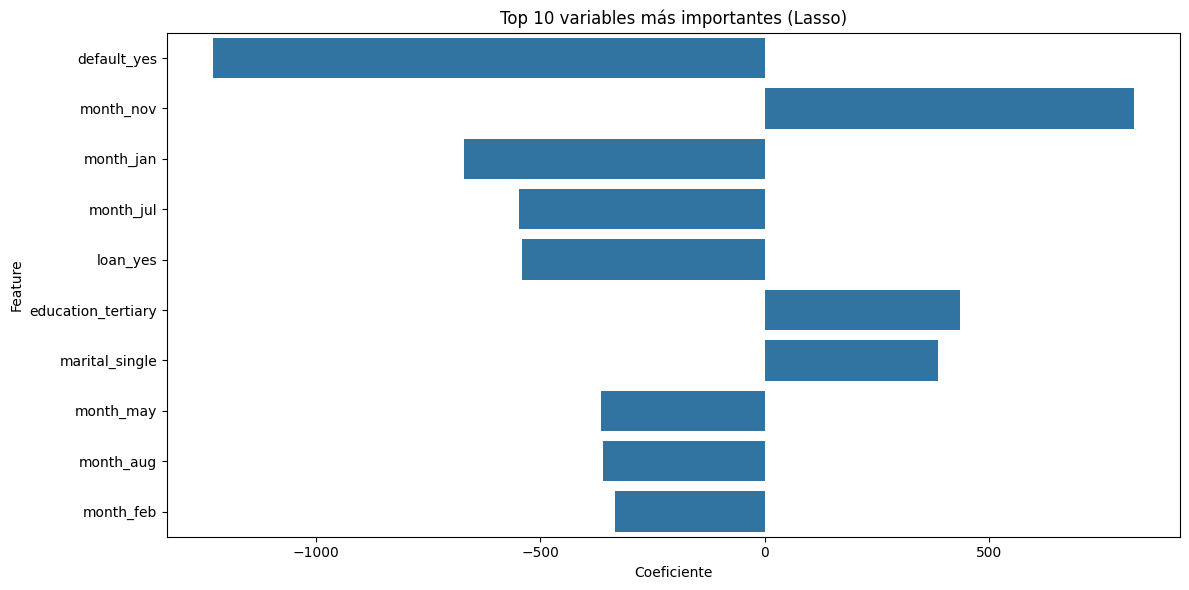

In [244]:
# Obtener coeficientes del modelo Lasso
feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_lasso.coef_
})

# Ordenar coeficientes por valor absoluto
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Mostrar los 10 coeficientes más importantes
print("Top 10 variables más importantes según Lasso:")
print(coef_df_sorted.head(10))

# Contar variables eliminadas (coeficientes = 0)
zero_coef = len(coef_df[coef_df['Coefficient'] == 0])
print(f"\nNúmero de variables eliminadas por Lasso (coeficiente = 0): {zero_coef}")

# Visualizar coeficientes más importantes
plt.figure(figsize=(12, 6))
sns.barplot(data=coef_df_sorted.head(10), x='Coefficient', y='Feature')
plt.title('Top 10 variables más importantes (Lasso)')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

1. **Indicadores de Riesgo y Bajo Balance (Coeficientes Negativos Altos)**
   Los coeficientes negativos más prominentes señalan los segmentos de clientes con menor saldo en cuenta, representando un riesgo o un valor de cliente inferior para el banco.

   Impacto de default_yes: La tenencia de un default crediticio es el factor que más reduce el balance predicho. Esto valida la intuición de que un historial financiero negativo y una gestión de deuda deficiente se correlacionan directamente con una menor capacidad de ahorro o saldos operativos. Esta es la variable más crítica para la gestión del riesgo crediticio y la segmentación de clientes de bajo valor.

   Estacionalidad Negativa: La agrupación de meses como Enero, Julio, Mayo, Agosto y Febrero con coeficientes negativos sugiere que los clientes contactados durante estos periodos (o que fueron activos en ellos) tienen balances consistentemente bajos. Esto podría estar relacionado con ciclos de gasto específicos (ej. vacaciones en Julio/Agosto, impuestos en Enero, etc.) donde los clientes agotan sus ahorros.

2. **Indicadores de Alto Valor y Oportunidad (Coeficientes Positivos Altos)**
   Los coeficientes positivos altos definen a los clientes con un balance promedio superior, representando una oportunidad de negocio más lucrativa para el banco.

   Estacionalidad Positiva (month_nov): El coeficiente positivo dominante asociado a Noviembre es un hallazgo clave. Este mes es un predictor fuerte de un alto balance, lo que podría deberse a la recepción de pagas extra, bonificaciones anuales, o una fase de ahorro previa a la temporada navideña. Noviembre es el momento óptimo para identificar y ofrecer productos financieros a clientes con alta liquidez.

   Perfiles Demográficos de Alto Balance:

   - education_tertiary: Un nivel educativo superior se asocia a salarios más altos y, por lo tanto, a un balance superior.

   - marital_single: La asociación con clientes solteros puede reflejar una menor carga de responsabilidades financieras compartidas en comparación con otros estados civiles, lo que les permite mantener un mayor saldo individual.

## 💠 Árboles y Bagging

En esta sección nos enfocaremos en los modelos no lineales basados en árboles y su primer ensemble.

### 💠 Análisis de Overfitting en Árboles de Regresión
Este bloque de código entrena múltiples modelos DecisionTreeRegressor variando la profundidad máxima del árbol (max_depth) para analizar cómo afecta la complejidad del modelo al error de entrenamiento (train) y de prueba (test).

Objetivo:
- Evaluar el sobreajuste (overfitting) y subajuste (underfitting) observando la evolución del RMSE en función de la profundidad del árbol.
- Determinar visualmente la profundidad óptima que equilibra buen rendimiento en test sin sobreajustar los datos de entrenamiento.

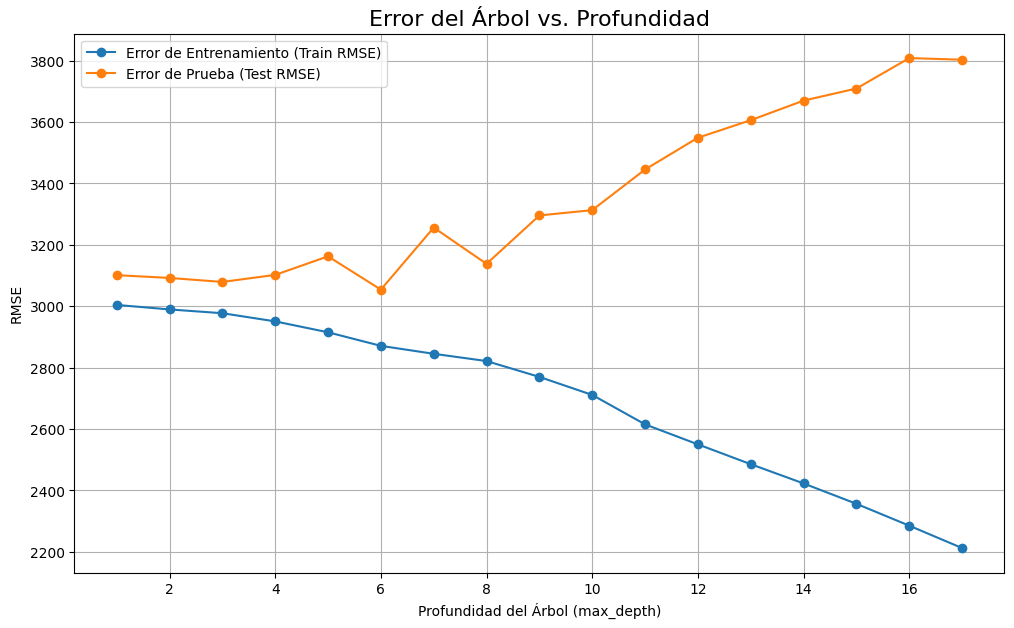

In [245]:
# DecisionTreeRegressor
max_depths = range(1, 18)
train_rmses = []
test_rmses = []

for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    # Error en train
    y_pred_train = tree.predict(X_train)
    train_rmses.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    
    # Error en test
    y_pred_test = tree.predict(X_test)
    test_rmses.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Graficamos los resultados
plt.figure(figsize=(12, 7))
plt.plot(max_depths, train_rmses, 'o-', label='Error de Entrenamiento (Train RMSE)')
plt.plot(max_depths, test_rmses, 'o-', label='Error de Prueba (Test RMSE)')
plt.xlabel('Profundidad del Árbol (max_depth)')
plt.ylabel('RMSE')
plt.title('Error del Árbol vs. Profundidad', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### Conclusión

Cuando la profundidad del árbol es muy baja (1–3), tanto el error de entrenamiento como el de prueba son altos, lo que indica subajuste (underfitting): el modelo no tiene suficiente capacidad para aprender los patrones de los datos.

A medida que aumenta la profundidad, el error de entrenamiento disminuye rápidamente, pero el error de prueba empieza a aumentar a partir de la profundidad 6, mostrando que el modelo comienza a sobreajustar (overfitting) los datos. Este es el “punto dulce” del modelo, es decir, la profundidad óptima donde el modelo generaliza mejor.

Por tanto, en este dataset, el árbol con max_depth ≈ 6 logra un equilibrio entre precisión y generalización, evitando tanto el subajuste como el sobreajuste.

## 💠 Optimización de Decision Tree con GridSearchCV

Este código realiza una búsqueda de hiperparámetros para un DecisionTreeRegressor usando GridSearchCV. Se prueban distintos valores de max_depth, min_samples_split y min_samples_leaf para encontrar la combinación que minimice el RMSE en validación cruzada. Finalmente, se evalúa el modelo óptimo en el conjunto de prueba.

In [246]:
tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

# Entrenar la búsqueda
inicio = time.time()
grid_search.fit(X_train, y_train)
fin = time.time()

tree_time = fin - inicio
print("Tiempo Decision Tree (GridSearchCV):")
print(f"{tree_time:.2f}")

# Calcular el RMSE
mejor_modelo = grid_search.best_estimator_

print("Mejores parámetros del Decision Tree:")
print(grid_search.best_params_)

y_pred = mejor_modelo.predict(X_test)

# Evaluar modelo
tree_r2_final = r2_score(y_test, y_pred)
tree_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nEvaluación del modelo Decision Tree (GridSearchCV):")
print(f"RMSE: {tree_rmse_final:.2f}")
print(f"R²: {tree_r2_final:.4f}\n")

Tiempo Decision Tree (GridSearchCV):
1.13
Mejores parámetros del Decision Tree:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Evaluación del modelo Decision Tree (GridSearchCV):
RMSE: 3079.03
R²: 0.0323



## 💠 Optimización de Random Forest con GridSearchCV

Este código entrena un RandomForestRegressor buscando automáticamente la mejor combinación de hiperparámetros (n_estimators y max_depth) usando GridSearchCV. Se calcula el tiempo de entrenamiento y se evalúa el modelo final en el conjunto de prueba mediante RMSE y R².

In [247]:
forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [5, 6, 7]
}

grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=0
)

inicio = time.time()
grid_search.fit(X_train, y_train)
fin = time.time()
forest_time = fin - inicio

# Calcular el RMSE
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

forest_r2_final = r2_score(y_test, y_pred)
forest_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

resultados_rf = pd.DataFrame({
    "Modelo": ["Random Forest (GridSearchCV)"],
    "Tiempo Entrenamiento (s)": [forest_time],
    "Mejores Parámetros": [grid_search.best_params_],
    "RMSE Test": [forest_rmse_final],
    "R2 Test": [forest_r2_final]
})

print(resultados_rf)

                         Modelo  Tiempo Entrenamiento (s)  \
0  Random Forest (GridSearchCV)                 18.367269   

                      Mejores Parámetros    RMSE Test   R2 Test  
0  {'max_depth': 6, 'n_estimators': 200}  3063.221455  0.042202  


## 💠 Optimización de Gradient Boosting con GridSearchCV

Este código entrena un Gradient Boosting buscando automáticamente la mejor combinación de hiperparámetros (n_estimators, learning_rate y max_depth) usando GridSearchCV. Se calcula el tiempo de entrenamiento y se evalúa el modelo final en el conjunto de prueba mediante RMSE y R².

In [248]:
# --- 1. Modelo Gradient Boosting (con GridSearchCV) ---
print("Iniciando GridSearchCV para Gradient Boosting...")
print("Esto puede tardar varios minutos...")

# Definir el modelo
gb_model = GradientBoostingRegressor(random_state=42)

# Definir el grid de hiperparámetros
# (Es un grid pequeño para que no tarde una eternidad)
param_grid_gb = {
    'n_estimators': [100, 150, 200],         # Número de árboles
    'learning_rate': [0.03, 0.05, 0.1],       # Tasa de aprendizaje
    'max_depth': [3, 6, 8]                 # Profundidad máxima
}

# Configurar GridSearchCV
# Usamos scoring='neg_mean_squared_error' para optimizar RMSE
# O 'r2' para ser consistentes con tu búsqueda anterior
grid_gb = GridSearchCV(estimator=gb_model,
                       param_grid=param_grid_gb,
                       cv=5,  # 3-fold CV para ir más rápido (puedes usar 5)
                       scoring='r2',
                       n_jobs=-1, # Usar todos los procesadores
                       verbose=1)

# Medir el tiempo de entrenamiento
start_time = time.time()
grid_gb.fit(X_train, y_train)
end_time = time.time()

gb_time = end_time - start_time

print(f"\nTiempo de entrenamiento Gradient Boosting (GridSearchCV): {gb_time:.2f} segundos")
print(f"Mejores parámetros encontrados: {grid_gb.best_params_}")

# Obtener el mejor modelo
best_gb = grid_gb.best_estimator_

# --- 2. Evaluación del modelo Gradient Boosting ---

print("\nEvaluación del modelo Gradient Boosting (con mejores hiperparámetros):")

# Predicciones
gb_train_pred = best_gb.predict(X_train)
gb_test_pred = best_gb.predict(X_test)

# Evaluar
gb_test_r2 = r2_score(y_test, gb_test_pred)
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))

print(f"RMSE Test: {gb_test_rmse:.2f}")
print(f"R² Test: {gb_test_r2:.4f}\n")

Iniciando GridSearchCV para Gradient Boosting...
Esto puede tardar varios minutos...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Tiempo de entrenamiento Gradient Boosting (GridSearchCV): 85.29 segundos
Mejores parámetros encontrados: {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100}

Evaluación del modelo Gradient Boosting (con mejores hiperparámetros):
RMSE Test: 3060.83
R² Test: 0.0437



## 💠 Tabla Maestra de Resultados

In [249]:
# --- Recolección de Métricas ---
# Asumimos que 'lr_model', 'best_lasso', y 'best_gb' SÍ existen en memoria de tu script anterior.

# 1. Crear la lista de datos manualmente
# Esta es la forma más robusta de hacerlo, usando las variables de tu script.
metric_data = [
    # (Nombre, R², RMSE)
    ("Regresión Lineal", lr_r2, lr_rmse, lr_time),
    ("Ridge", ridge_r2, ridge_rmse, ridge_time),
    ("Lasso", lasso_r2, lasso_rmse, lasso_time),
    ("Decission Tree Optimizado", tree_r2_final, tree_rmse_final, tree_time),
    ("Random Forest Optimizado", forest_r2_final, forest_rmse_final, forest_time),
    ("Gradient Boosting Optimizado", gb_test_r2, gb_test_rmse, gb_time)
]

# 2. Construir el DataFrame
resultados = []

for nombre, r2, rmse, time in metric_data:
    resultados.append({
        "Modelo": nombre,
        "R² Test": r2,
        "RMSE Test": rmse,
        "Tiempo": time
    })

# --- Crear la Tabla Maestra ---
if resultados:
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.set_index('Modelo')
    df_resultados = df_resultados.sort_values(by='R² Test', ascending=False)
    
    # Mostrar la tabla
    print("\n--- Tabla Maestra de Resultados (TEST set) ---")
    display(df_resultados.style.format({
        'R² Test': '{:.4f}',
        'RMSE Test': '{:,.2f}'
    }))
else:
    print("La lista 'metric_data' está vacía. Verifica las variables.")


--- Tabla Maestra de Resultados (TEST set) ---


,R² Test,RMSE Test,Tiempo
Modelo,,,
Lasso,0.0474,"3,054.97",28.153027
Ridge,0.0469,"3,055.72",1.120822
Regresión Lineal,0.0468,"3,055.78",0.038731
Gradient Boosting Optimizado,0.0437,"3,060.83",85.285104
Random Forest Optimizado,0.0422,"3,063.22",18.367269
Decission Tree Optimizado,0.0323,"3,079.03",1.125564


### 📌 Conclusiones de la tabla maestra
Rendimiento General de los Modelos

En términos generales, el rendimiento predictivo de todos los modelos es bajo, lo que se evidencia en los valores del coeficiente de determinación R^2 que están muy cerca de cero (entre 0.032 y 0.047).

- Bajo R^2: Un valor de R^2 alrededor de $0.047$ (el mejor resultado) indica que los modelos solo logran explicar aproximadamente el 4.7% de la variabilidad presente en la variable objetivo (el Balance). Esto sugiere que el dataset carece de variables lo suficientemente informativas o que la relación subyacente entre las características y el Balance no es bien capturada por estos algoritmos.

- RMSE Consistente: El error cuadrático medio (RMSE) es muy similar en todos los modelos, rondando los $3055$ a $3060$. Esto confirma que la diferencia real en la precisión de la predicción entre los modelos es mínima.

**Clasificación de Modelos por Rendimiento**

1. **Mejor Rendimiento Predictivo (Liderazgo de Lasso):**

   El modelo Lasso obtiene el rendimiento ligeramente superior con el $R^2$ más alto ($0.0474$) y el RMSE más bajo ($3,054.97$).

2. **Modelos Lineales Consistentes:**

   Ridge y Regresión Lineal Simple son prácticamente indistinguibles en rendimiento ($R^2 \approx 0.0469$), confirmando la naturaleza lineal de la relación que el modelo Lasso aprovechó con la selección de variables.

3. **Algoritmos árboles (Rendimiento Inferior):**

   Sorprendentemente, los modelos más complejos y optimizados (Gradient Boosting, Random Forest y Decission Tree) no superan a los modelos lineales simples. De hecho, el Decission Tree Optimizado obtiene el peor rendimiento ($R^2 = 0.0323$), lo que sugiere que la complejidad o las interacciones no lineales no aportan valor predictivo en este dataset.

## 💠 Comparar las Importancias de Variables

Esta celda genera los tres gráficos de importancia de variables uno al lado del otro.

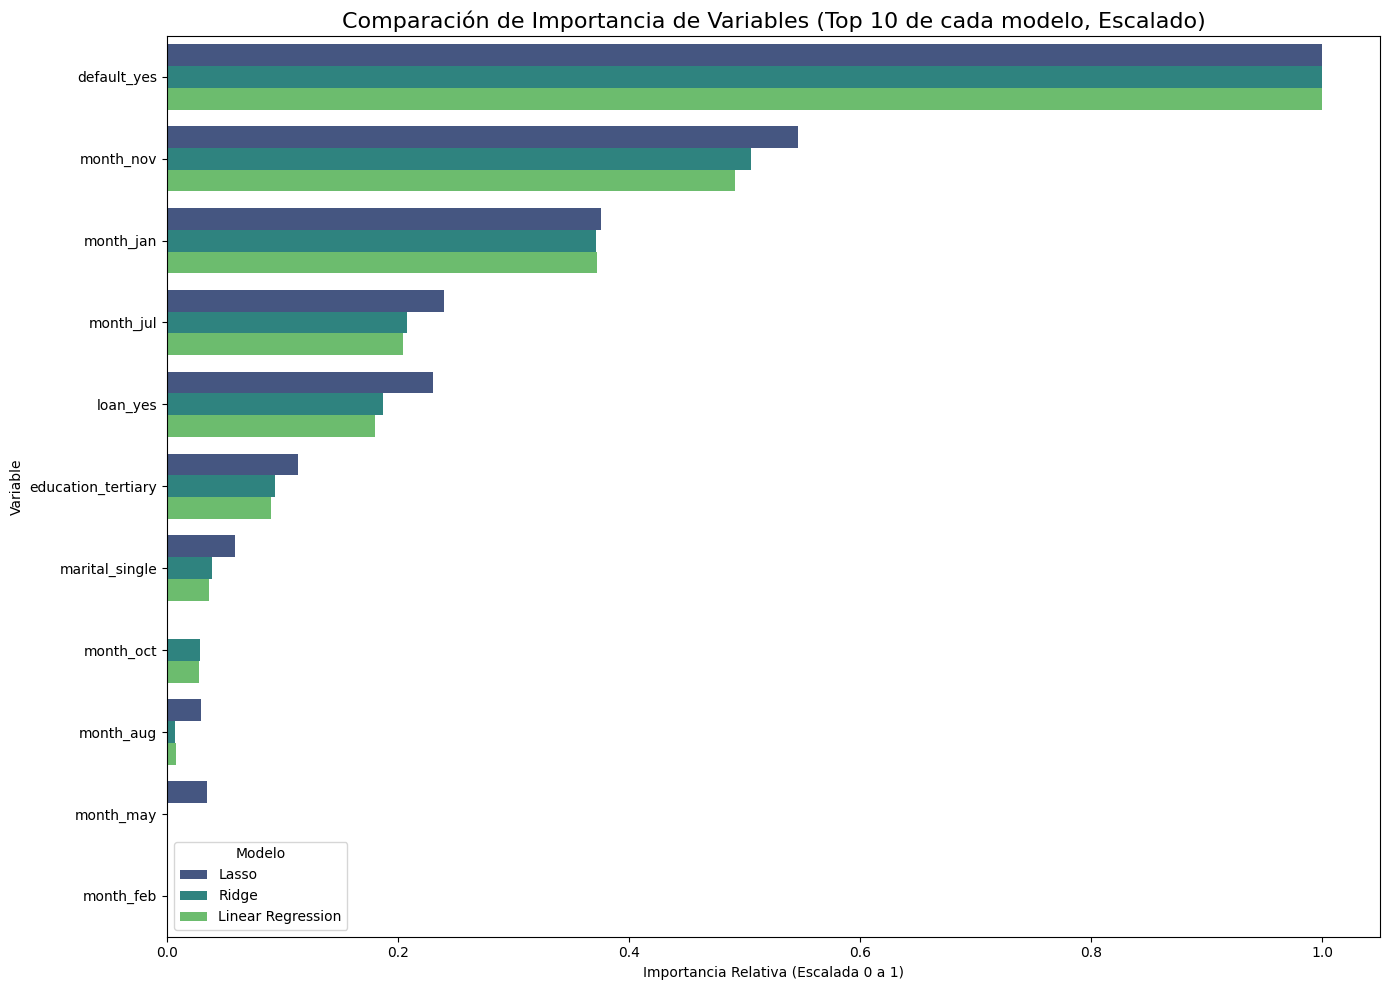

In [253]:
feature_names = X_train.columns

# --- 1. Crear dataframes de coeficientes ---

# Lasso
coef_lasso = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_lasso.coef_
})
coef_lasso['Abs_Coefficient'] = abs(coef_lasso['Coefficient'])
coef_lasso_sorted = coef_lasso.sort_values('Abs_Coefficient', ascending=False).head(10)

# Ridge
coef_ridge = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_ridge.coef_
})
coef_ridge['Abs_Coefficient'] = abs(coef_ridge['Coefficient'])
coef_ridge_sorted = coef_ridge.sort_values('Abs_Coefficient', ascending=False).head(10)

# Regresión Lineal
coef_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_
})
coef_lr['Abs_Coefficient'] = abs(coef_lr['Coefficient'])
coef_lr_sorted = coef_lr.sort_values('Abs_Coefficient', ascending=False).head(10)

# --- 2. Escalar e indicar modelo ---
scaler = MinMaxScaler()

def scale_df(df, model_name):
    df_scaled = df.copy()
    df_scaled['Scaled_Importance'] = scaler.fit_transform(df_scaled[['Abs_Coefficient']])
    df_scaled['Model'] = model_name
    return df_scaled[['Feature', 'Scaled_Importance', 'Model']]

df_lasso_scaled = scale_df(coef_lasso_sorted, 'Lasso')
df_ridge_scaled = scale_df(coef_ridge_sorted, 'Ridge')
df_lr_scaled = scale_df(coef_lr_sorted, 'Linear Regression')

# --- 3. Combinar ---
df_combined = pd.concat([df_lasso_scaled, df_ridge_scaled, df_lr_scaled])

# --- 4. Graficar ---
order = df_combined.groupby('Feature')['Scaled_Importance'].sum().sort_values(ascending=False).index

plt.figure(figsize=(14,10))
sns.barplot(
    data=df_combined,
    x='Scaled_Importance',
    y='Feature',
    hue='Model',
    palette='viridis',
    order=order
)
plt.title('Comparación de Importancia de Variables (Top 10 de cada modelo, Escalado)', fontsize=16)
plt.xlabel('Importancia Relativa (Escalada 0 a 1)')
plt.ylabel('Variable')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

### 📌 Conclusiones de la tabla maestra
Rendimiento General de los Modelos

En términos generales, el rendimiento predictivo de todos los modelos es bajo, lo que se evidencia en los valores del coeficiente de determinación R^2 que están muy cerca de cero (entre 0.032 y 0.047).

- Bajo R^2: Un valor de R^2 alrededor de $0.047$ (el mejor resultado) indica que los modelos solo logran explicar aproximadamente el 4.7% de la variabilidad presente en la variable objetivo (el Balance). Esto sugiere que el dataset carece de variables lo suficientemente informativas o que la relación subyacente entre las características y el Balance no es bien capturada por estos algoritmos.

- RMSE Consistente: El error cuadrático medio (RMSE) es muy similar en todos los modelos, rondando los $3055$ a $3060$. Esto confirma que la diferencia real en la precisión de la predicción entre los modelos es mínima.

Clasificación de Modelos por Rendimiento

1. **Mejor Rendimiento Predictivo (Liderazgo de Lasso):**

   El modelo Lasso obtiene el rendimiento ligeramente superior con el $R^2$ más alto ($0.0474$) y el RMSE más bajo ($3,054.97$).

2. **Modelos Lineales Consistentes:**

   Ridge y Regresión Lineal Simple son prácticamente indistinguibles en rendimiento ($R^2 \approx 0.0469$), confirmando la naturaleza lineal de la relación que el modelo Lasso aprovechó con la selección de variables.

3. **Algoritmos árboles (Rendimiento Inferior):**

   Sorprendentemente, los modelos más complejos y optimizados (Gradient Boosting, Random Forest y Decission Tree) no superan a los modelos lineales simples. De hecho, el Decission Tree Optimizado obtiene el peor rendimiento ($R^2 = 0.0323$), lo que sugiere que la complejidad o las interacciones no lineales no aportan valor predictivo en este dataset.

#### 💠 Impacto del Default

Esta pregunta compara el Balance medio entre los clientes que tienen default='yes' y los que tienen default='no'.

In [297]:
balance_medias = df.groupby("default")["balance"].mean().round(2)
balance_no = balance_medias["no"]
balance_yes = balance_medias["yes"]

from IPython.display import Markdown, display

display(Markdown(f"""
### 💳 **Balance medio según historial de impago (default)**

<div style="display: flex; gap: 20px;">

<div style="padding: 15px; border: 1px solid #ccc; border-radius: 10px; width: 200px;">
<b>Default = NO</b><br>
💰 <b>{balance_no} €</b>
</div>

<div style="padding: 15px; border: 1px solid #ccc; border-radius: 10px; width: 200px;">
<b>Default = YES</b><br>
💰 <b>{balance_yes} €</b>
</div>

</div>
"""))



### 💳 **Balance medio según historial de impago (default)**

<div style="display: flex; gap: 20px;">

<div style="padding: 15px; border: 1px solid #ccc; border-radius: 10px; width: 200px;">
<b>Default = NO</b><br>
💰 <b>1389.81 €</b>
</div>

<div style="padding: 15px; border: 1px solid #ccc; border-radius: 10px; width: 200px;">
<b>Default = YES</b><br>
💰 <b>-137.62 €</b>
</div>

</div>


Los resultados muestran una diferencia muy clara entre los clientes con y sin historial de impagos:

- **Default = NO → Balance medio: +1389.81 €**  
- **Default = YES → Balance medio: –137.62 €**

Esto indica que los clientes que **no han tenido impagos previos** suelen mantener un balance muy superior, mientras que aquellos con historial de impago presentan balances negativos en promedio.  
👉 *Conclusión:* el historial de impago es un factor determinante para explicar el nivel de liquidez de un cliente. Tener deudas o impagos previos no solo afecta al riesgo crediticio, sino que también se refleja directamente en un balance mucho más bajo.

#### 💠 Ciclo de Liquidez (Oportunidad Estacional)

Esta pregunta visualiza la tendencia del Balance promedio a lo largo de los 12 meses, destacando Noviembre y Enero                         

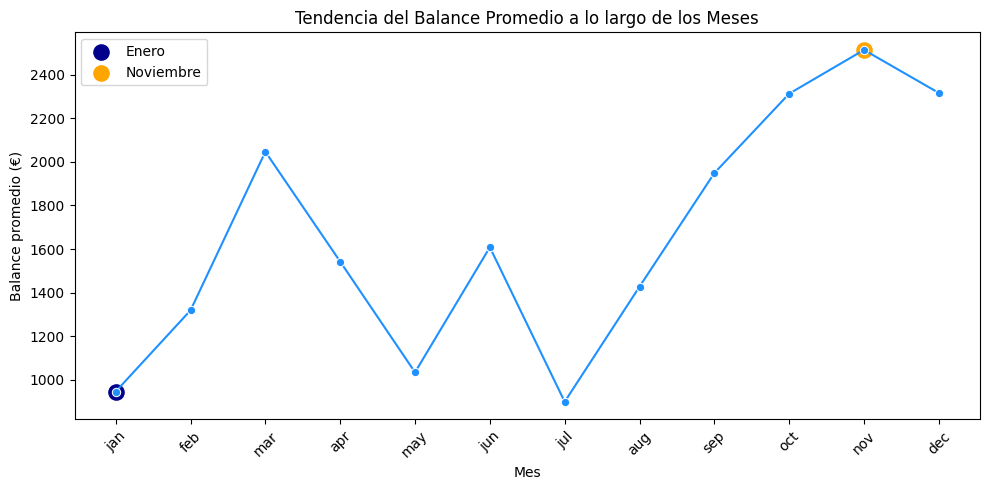

In [308]:
# # Definición del orden correcto de los meses
df_months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# # Asegurarse de que la columna 'month' tiene el orden correcto
df['month'] = pd.Categorical(df['month'], categories=df_months_order, ordered=True)

# # Agrupamos el Balance por Mes
balance_por_mes = df.groupby('month', observed=False)['balance'].mean().reset_index()

plt.figure(figsize=(10, 5))

sns.lineplot(
    data=balance_por_mes,
    x="month",
    y="balance",
    marker="o",
    sort=False,
    color="dodgerblue",
    errorbar=('ci', 95)
)

# Destacar meses específicos
for i, row in balance_por_mes.iterrows():
    if row["month"] == "nov":
        plt.scatter(i, row["balance"], color="orange", s=120, label="Noviembre")
    elif row["month"] == "jan":
        plt.scatter(i, row["balance"], color="darkblue", s=120, label="Enero")

plt.title("Tendencia del Balance Promedio a lo largo de los Meses")
plt.xlabel("Mes")
plt.ylabel("Balance promedio (€)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

La tendencia mensual del balance muestra oscilaciones muy marcadas a lo largo del año:

- El balance es más bajo a comienzos de año y en verano, destacando **enero (~950 €)** y **julio (~900 €)** como meses mínimos.  
- A partir de agosto la curva comienza a subir con fuerza, alcanzando el **máximo en noviembre (~2500 €)**.  

Este comportamiento sugiere que existen **patrones estacionales de liquidez**, probablemente relacionados con:
- gastos fuertes en verano,  
- ajustes económicos de mitad de año,  
- incremento de ingresos en otoño (bonus, pagas extra, campañas comerciales).

👉 *Conclusión:* el momento del año influye considerablemente en el balance de los clientes, lo que indica que el banco podría ajustar campañas o productos según el ciclo de liquidez estacional.

#### 💠 Valor por Educación (Segmentación Demográfica)

Esta pregunta confirma qué nivel educativo se asocia con el Balance promedio más alto.

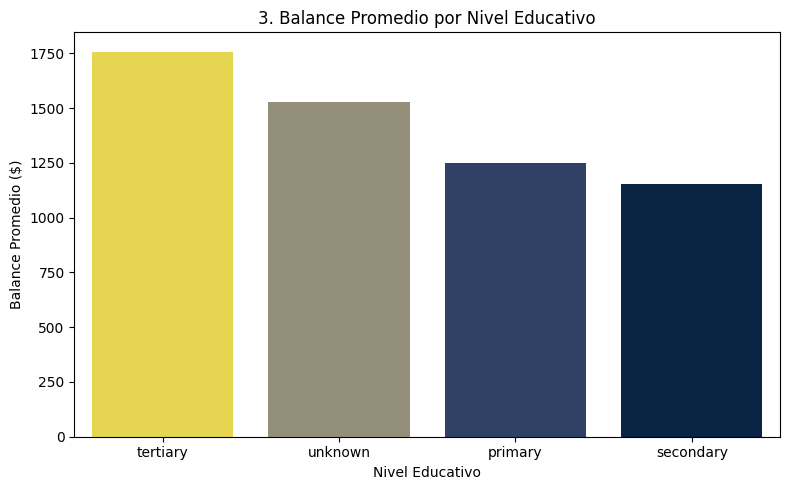

In [315]:
plt.figure(figsize=(8, 5))

# Agrupamos y ordenamos los niveles educativos por su Balance medio
balance_por_educacion = df.groupby('education')['balance'].mean().sort_values(ascending=False).reset_index()

# Usamos un gráfico de barras para ver la jerarquía de balances
sns.barplot(x='education', y='balance', data=balance_por_educacion, palette='cividis', hue='balance', legend=False)

plt.title('3. Balance Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Balance Promedio ($)')
plt.tight_layout()
plt.show()

El nivel educativo también muestra un patrón claro respecto al balance promedio:

- **Tertiary** → ~1750 €  
- **Unknown** → ~1520 €  
- **Primary** → ~1250 €  
- **Secondary** → ~1150 €  

Los clientes con **educación superior (tertiary)** son los que presentan mayores balances, seguidos del grupo con educación no declarada. Los niveles educativos más bajos se asocian con balances más reducidos.

👉 *Conclusión:* existe una relación consistente entre nivel educativo y estabilidad económica: a mayor formación, mayor capacidad de ahorro o acumulación de capital.

Estos tres análisis apuntan a un patrón común: **el perfil económico del cliente está influido tanto por factores individuales (deudas, educación) como por factores temporales (estacionalidad del año).**  

En especial, el historial de impago y el nivel educativo destacan como variables con una relación muy marcada respecto al balance promedio, mientras que la estacionalidad añade una capa temporal que ayuda a entender mejor el comportamiento financiero a lo largo del año.


---

## 1️⃣4️⃣ **Conclusiones finales**

A lo largo de este trabajo hemos analizado el **Bank Marketing Dataset (UCI)** con un doble objetivo: por un lado, entender el perfil de los clientes del banco mediante un análisis exploratorio detallado; y por otro, construir modelos de **clasificación binaria** que permitan predecir dos indicadores derivados: `Patrimonio_Alto` (Escenario A) y `Riesgo_Sobregiro` (Escenario B).

El EDA mostroó que el **dataset presenta un desbalanceo muy acusado en ambas variables objetivo** (tanto en `Patrimonio_Alto` como en `Riesgo_Sobregiro`). Esto ha influido directamente en el rendimiento de los modelos, ya que métricas como la precisión o el F1 se ven afectadas cuando la clase positiva es tan minoritaria. Aunque aplicamos técnicas como *SMOTE* para equilibrar los conjuntos de entrenamiento, es importante tener en cuenta que estos métodos no solucionan completamente el problema y, por tanto, es normal que algunos modelos no hayan ofrecido estadísticas especialmente altas o perfectas.

En el **Escenario A**, definimos `Patrimonio_Alto` a partir de los percentiles superiores del balance para identificar a los clientes con mayor capacidad económica. El análisis descriptivo y los estudios por subgrupos dejaron claro que los clientes con patrimonio alto tienden a concentrarse en perfiles **sin impagos ni préstamos activos**, con mayor presencia de profesiones de tipo *management* o personas *retired*, niveles educativos superiores (`tertiary`) y, en menor medida, estados civiles más estables. Además, variables como el mes de contacto (`month`) y el resultado de campañas previas (`poutcome`) aportan información útil sobre la probabilidad de pertenecer a este grupo. Tras comparar distintos algoritmos (Regresión Logística, Árboles de Decisión, Random Forest, KNN, Naive Bayes, SVM y MLP), el modelo **SVM lineal** resultó especialmente competitivo, y su análisis de coeficientes reforzó la relevancia de las variables de riesgo (`default`, `loan`, `housing`) y sociodemográficas (`marital`, `education`, `job`, `month`).

En el **Escenario B**, el foco se desplazó hacia la detección de clientes con `Riesgo_Sobregiro`, construido a partir de saldos negativos y umbrales relacionados con descubiertos. En este caso, los patrones se invierten: tener **préstamos personales o hipoteca** aumenta notablemente la tasa de sobregiro, y determinados estados civiles (como personas divorciadas) presentan un mayor riesgo. También se observó una clara **estacionalidad**: los meses de primavera-verano acumulan más casos de sobregiro, mientras que septiembre y octubre muestran niveles mínimos, lo que podría estar relacionado con picos de gasto o momentos de menor liquidez. Para este escenario, la **Regresión Logística** ofreció un buen equilibrio entre interpretabilidad y rendimiento, permitiendo cuantificar cómo cambian las probabilidades de sobregiro en función del endeudamiento, la época del año o el historial de interacción del cliente (`poutcome` y `subscribed_term_deposit`).

En conjunto, ambos escenarios muestran una imagen coherente del comportamiento financiero de la cartera: **la estabilidad económica y la ausencia de deudas están fuertemente asociadas tanto a un mayor patrimonio como a un menor riesgo de sobregiro**, mientras que el contexto temporal y el historial de relación con el banco actúan como moduladores importantes. Los modelos de clasificación han permitido formalizar estas relaciones y transformarlas en reglas cuantitativas que podrían utilizarse en la práctica para segmentar clientes, priorizar campañas comerciales o ajustar políticas de riesgo. No obstante, el trabajo también presenta **limitaciones**: las variables objetivo se han definido a partir de umbrales simples sobre el `balance`, no se dispone de información detallada sobre ingresos o patrimonio real, y el desbalanceo de clases reduce la sensibilidad de algunos modelos.

Como líneas futuras, sería interesante incorporar **más variables financieras** (ingresos, productos contratados, historial temporal de movimientos) y considerar técnicas avanzadas de manejo de desbalanceo (como *class weights* o *threshold tuning* con un conjunto de validación específico). También podría explorarse la construcción de modelos conjuntos que integren ambos escenarios, de forma que el banco pueda identificar simultáneamente a los clientes **con alto valor potencial y bajo riesgo**, optimizando así sus estrategias de captación y fidelización. Aun con estas limitaciones, el proyecto consigue su objetivo principal: ofrecer una visión global, razonada y apoyada en modelos de machine learning sobre cómo se comportan los clientes del banco y qué factores son clave para explicar su nivel de patrimonio y su riesgo de sobregiro.

Finalmente, este trabajo nos deja claro que no siempre es posible obtener modelos exactos o métricas sobresalientes, especialmente cuando los datos presentan limitaciones estructurales como desbalanceo severo o falta de señales fuertes. Aun así, hemos conseguido construir una visión sólida y bien argumentada sobre el comportamiento financiero de los clientes del banco, cumpliendo con los objetivos principales del proyecto y aprendiendo muchísimo en el proceso.